In [1]:
library(heplots) # for etasq

Loading required package: car

Loading required package: carData



In [2]:
options(repr.matrix.max.cols=100, repr.matrix.max.rows=100)

In [3]:
source("get_data.R")
source("acf_analysis.R")
source("plotting.R")
source("acf_analysis_physical_anomalies.R")


Attaching package: 'plotly'


The following objects are masked from 'package:plyr':

    arrange, mutate, rename, summarise


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




In [4]:
manova_analysis <- function(data){
    # MANOVA manufacturers
    cat('\n----------------------\n')
    cat('scannermanufacturer')
    cat('\n----------------------\n')
    res.manova <- manova(
        cbind(
            minFWHMX, minFWHMY, maxFWHMX, maxFWHMY, mean, SNR, SFNR,
            std, percentFluc, drift, driftfit, rdc, meanGhost, meanBrightGhost
        ) ~ scannermanufacturer,
        data = data
    )
    print(summary(res.manova))
    #summary.aov(res.manova)
    print(etasq(res.manova))
    
    # MANOVA site
    cat('\n----------------------\n')
    cat('site')
    cat('\n----------------------\n')
    res.manova <- manova(
        cbind(
            minFWHMX, minFWHMY, maxFWHMX, maxFWHMY, mean, SNR, SFNR,
            std, percentFluc, drift, driftfit, rdc, meanGhost, meanBrightGhost
        ) ~ site,
        data = data
    )
    print(summary(res.manova))
    #summary.aov(res.manova)
    print(etasq(res.manova))
}



In [5]:
library(lme4)
library(lmerTest)

r2.corr.mer <- function(m) {
  lmfit <-  lm(model.response(model.frame(m)) ~ fitted(m))
  summary(lmfit)$r.squared
}

lmm_analysis <- function(data, grp, varlist){
    for (i in 1:length(varlist)){
        cat('----------------\n')
        cat(varlist[i])
        cat('\n----------------\n')
        lmm <- lmer(substitute(i ~ 1 + (1|g), list(i = as.name(varlist[i]), g = as.name(grp))), data = data)
        print(summary(lmm), digits = 3)
        print(confint(lmm), digits = 3)
        print(performance::icc(lmm, by_group=F), digits = 2)
        print(ranova(lmm), digits = 3)
        cat("Effect size:\n")
        print(r2.corr.mer(lmm), digits = 2)
        cat('\n')
    }
}

Loading required package: Matrix

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step




In [9]:
reorder_sites <- function(data){
    # reoder sites for plotting
    
    data$site <- factor(
        data$site,
        levels = c("CAM", "MCM", "SBH", "TWH", "UCA", "BYC", "WEU", "QNS", "TOH", "UTO", "SMH", "TBR", "UBC")
    )

    # sort by site
    data <- data[order(data$site),]

    # make sessionID an ordered factor so that ggplot does not sort it
    data$sessionID <- factor(data$sessionID, levels = data$sessionID)
    
    return(data)
}

# Unprocessed data


Total of  667  ACF sessions read.
Total of  667  fBIRN QA sessions read.
Total of  750  Spotfire sessions read.

The following sessions/sites excludes due to limited data points:
 [1] "HSC01_PHA_FBN1393_0001" "HSC01_PHA_FBN1393_0002" "HSC01_PHA_FBN1393_0003"
 [4] "HSC01_PHA_FBN1393_0004" "HSC01_PHA_FBN1393_0005" "HSC01_PHA_FBN1393_0006"
 [7] "HSC01_PHA_FBN1393_0007" "HSC01_PHA_FBN1393_0008" "HSC01_PHA_FBN1393_0009"
[10] "HSC01_PHA_FBN1393_0010" "HSC01_PHA_FBN1393_0011" "HSC01_PHA_FBN1393_0012"
[13] "HSC01_PHA_FBN1393_0013" "HSC01_PHA_FBN1393_0014" "HSC01_PHA_FBN1393_0015"
[16] "HSC01_PHA_FBN1393_0016" "HSC02_PHA_FBN1393_0001" "HSC02_PHA_FBN1393_0010"
[19] "HSC02_PHA_FBN1393_0011" "HSC02_PHA_FBN1393_0012" "HSC02_PHA_FBN1393_0013"
[22] "HSC02_PHA_FBN1393_0014" "HSC02_PHA_FBN1393_0015" "HSC02_PHA_FBN1393_0016"
[25] "HSC02_PHA_FBN1393_0017" "HSC02_PHA_FBN1393_0018" "HSC02_PHA_FBN1393_0019"
[28] "HSC02_PHA_FBN1393_0020" "HSC02_PHA_FBN1393_9991" "USP01_PHA_FBN1399_0001"
[31] "YRK01_PHA_FBN1

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warnin

$p_FWHM

$p_anomalies



Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` i

$biplot


Warning message in MASS::cov.trob(data[, vars]):
"Probable convergence failure"



$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"
Warning message in MASS::cov.trob(data[, vars]):
"Probable convergence failure"


$biplot


Warning message in MASS::cov.trob(data[, vars]):
"Probable convergence failure"



$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"


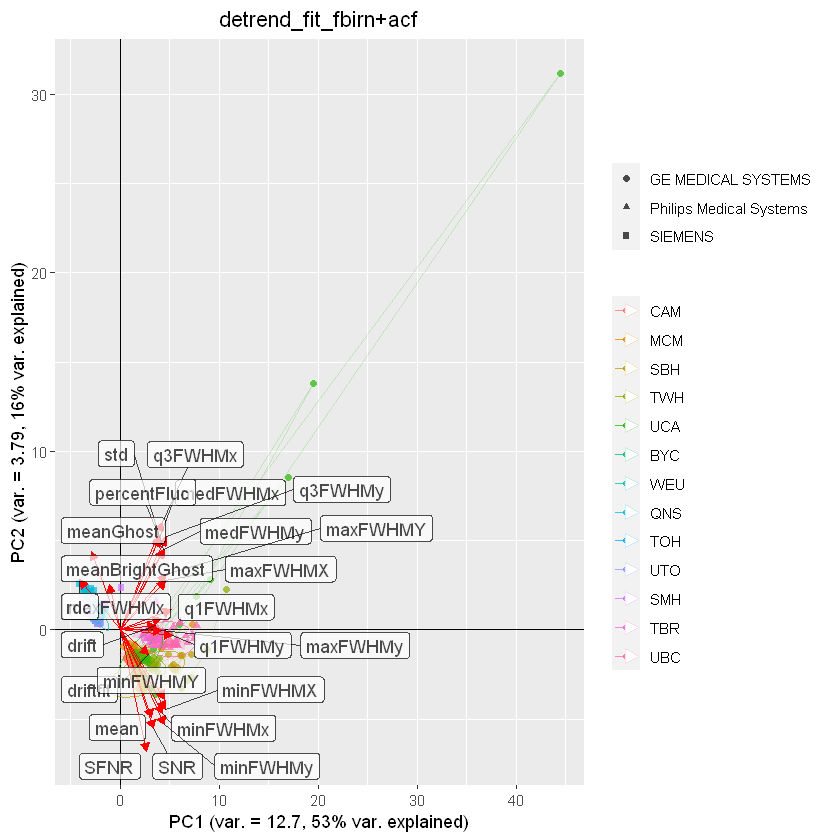

$biplot

$var_axis_plot
NULL

[1] "BYC"
3  anomalies out of  141 
[1] "BYC01_PHA_FBN1394_0014" "BYC01_PHA_FBN1394_0046" "BYC01_PHA_FBN1394_0098"
[1] "CAM"
4  anomalies out of  48 
[1] "CAM01_PHA_FBN1299_0001" "CAM01_PHA_FBN1299_0002" "CAM01_PHA_FBN1392_0000"
[4] "CAM01_PHA_FBN1392_0013"
[1] "MCM"
1  anomalies out of  47 
[1] "MCM01_PHA_FBN1307_0032"
[1] "QNS"
1  anomalies out of  46 
[1] "QNS01_PHA_FBN1305_9025"
[1] "SBH"
10  anomalies out of  35 
 [1] "SBH01_PHA_FBN1381_0001" "SBH01_PHA_FBN1381_0002" "SBH01_PHA_FBN1381_0003"
 [4] "SBH01_PHA_FBN1381_0004" "SBH01_PHA_FBN1381_0005" "SBH01_PHA_FBN1381_0006"
 [7] "SBH01_PHA_FBN1381_0007" "SBH01_PHA_FBN1381_0008" "SBH01_PHA_FBN1381_0009"
[10] "SBH01_PHA_FBN1381_0010"
[1] "TBR"
24  anomalies out of  30 
 [1] "TBR01_PHA_FBN1319_0001" "TBR01_PHA_FBN1319_0002" "TBR01_PHA_FBN1319_0005"
 [4] "TBR01_PHA_FBN1319_0006" "TBR01_PHA_FBN1319_0007" "TBR01_PHA_FBN1319_0008"
 [7] "TBR01_PHA_FBN1319_0009" "TBR01_PHA_FBN1319_0010" "TBR01_PHA_FBN1319_0011"
[1

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warnin

$p_FWHM

$p_anomalies



Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` i

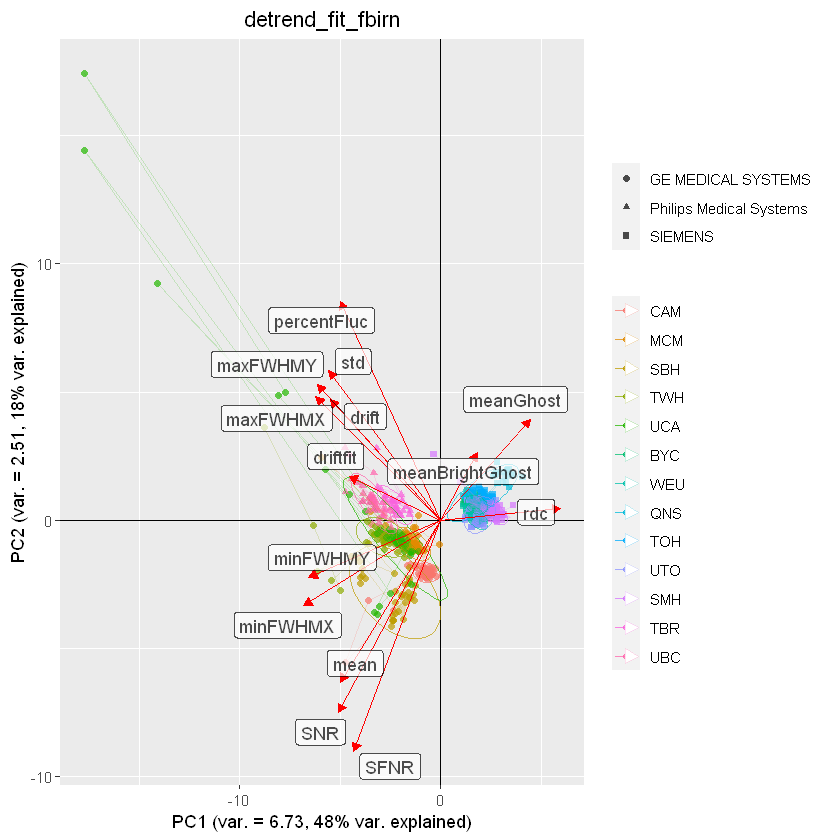

$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"


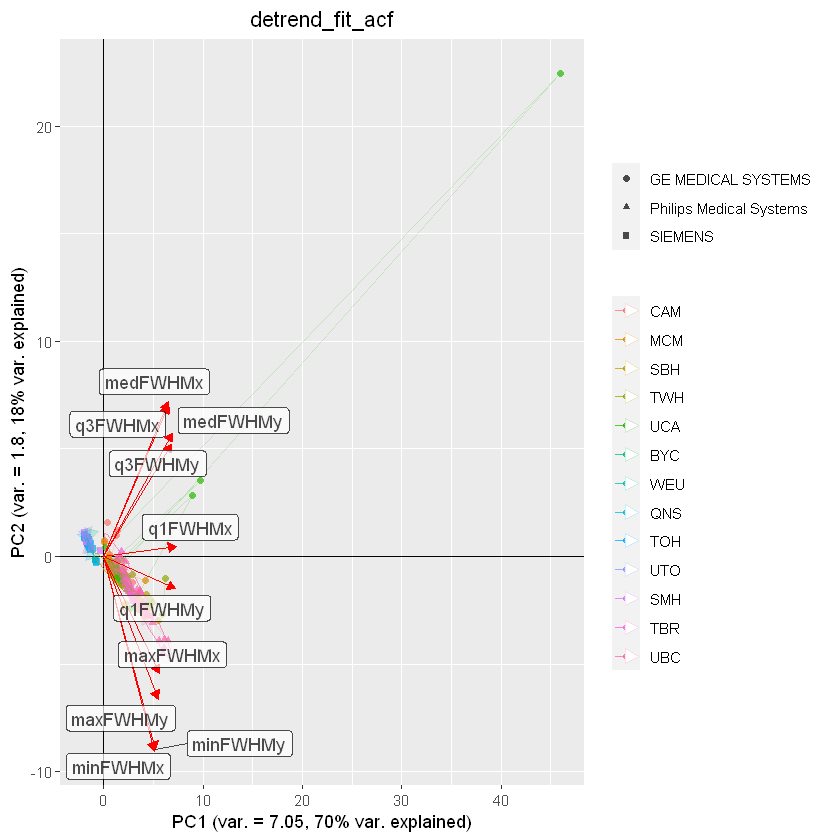

$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"


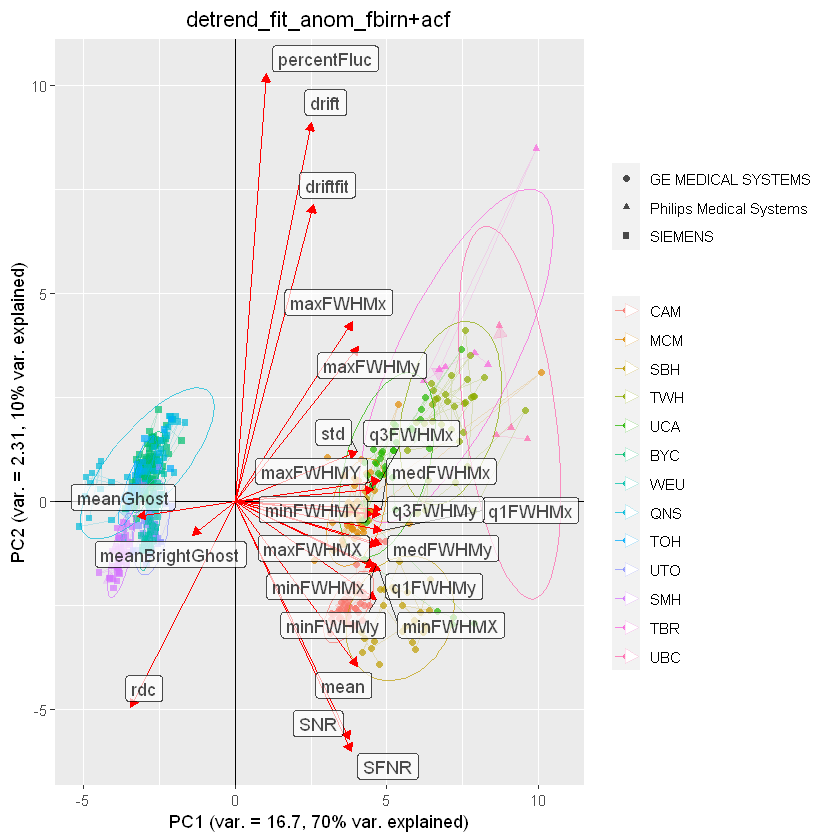

$biplot


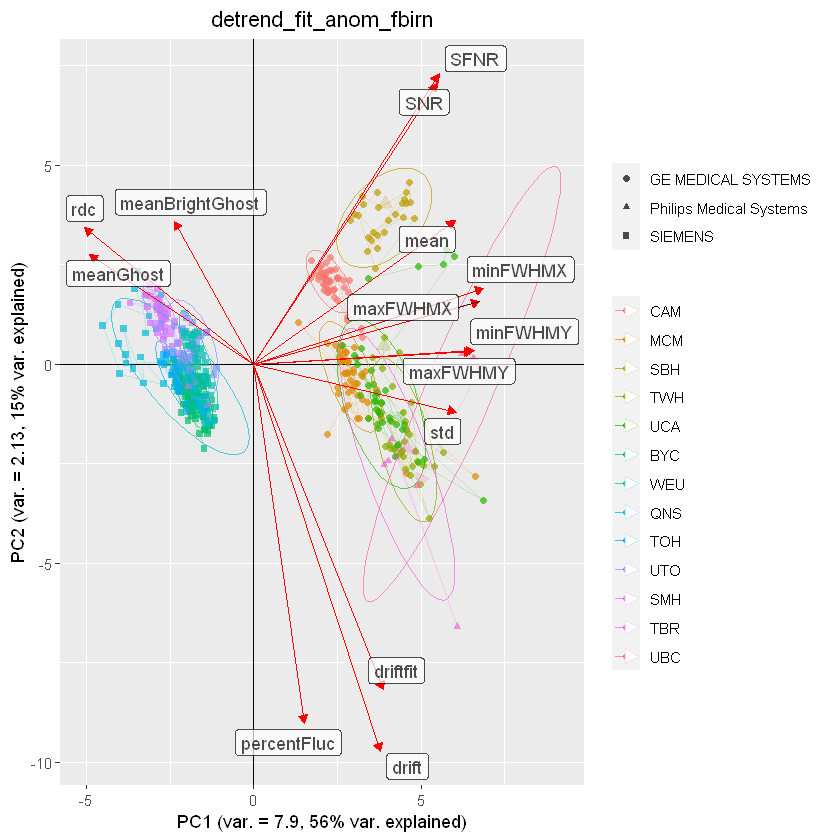


$var_axis_plot
NULL



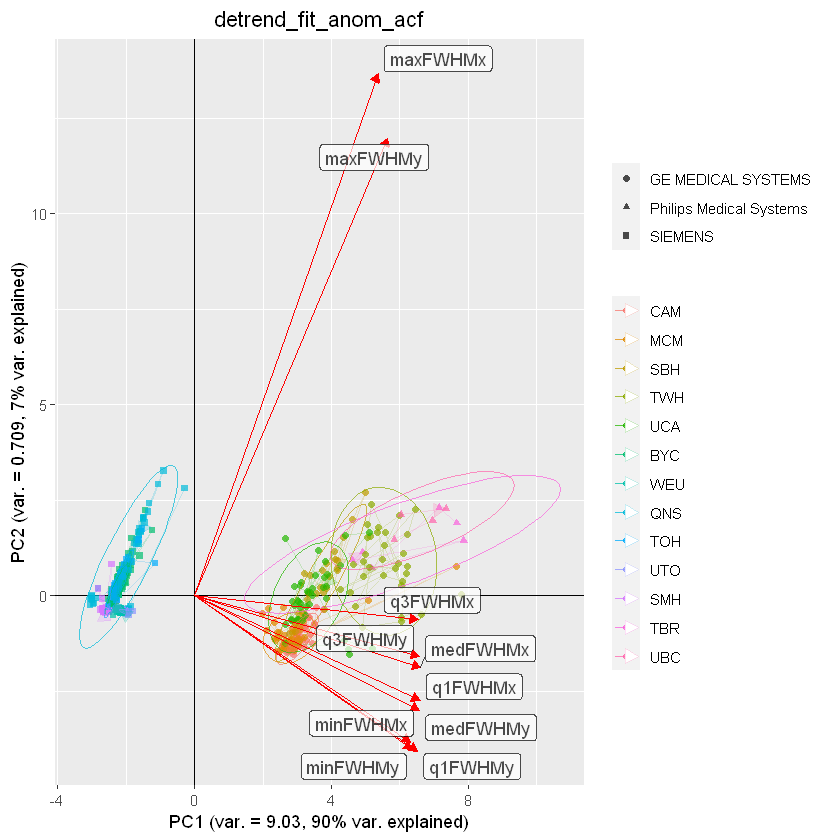

In [10]:
source("/Users/Aras/projects/phantomqa/phantomQA/plotting.R")

setwd("/Users/Aras/projects/phantomqa/phantomQA_data/detrend_fit")

acf_file <- "acfFWHM.csv"
fbirnQA_file <- "subjects_fbirnQA.csv"
spotfire_file <- "../fBIRN_MR_QA_20180820.csv"

acf_rem_suffix <- '_3dDetrend'
fbirn_rem_suffix <- ''

data_unproc <- get_data(acfFWHM_file = acf_file, fbirnQA_file = fbirnQA_file, spotfire_file = spotfire_file,
                 acf_rem_suffix = acf_rem_suffix, fbirn_rem_suffix = fbirn_rem_suffix)

data_unproc <- reorder_sites(data_unproc)


write.csv(data_unproc, file = "data_clean.csv")

plot_title <- 'detrend_fit'

# detect anomalies based on physical quantities of fwhm
sites <- c("BYC", "CAM", "MCM", "QNS", "SBH", "TBR", "SMH", "TOH", "TWH", "UBC", "UCA", "UTO", "WEU")

res_unproc <- acf_analysis(data = data_unproc,
                    plot_title = plot_title,
                    show.pca.varaxes = T,
                    show.pca.timecourse = T,
                    save_png = T,
                    pca.var_axes_separate = F,
                    pca.return_plotly = F, # turn off for better labeling of variable axes using ggrepel
                    anom_coef = 10)


In [7]:
head(data_unproc)

,sessionID,origdimensions,origspacing,origgap,slice,timepoints,roiSize,scanner,psdname,diffimagefile,meanimagefile,stdimagefile,sfnrimagefile,mean,SNR,SFNR,std,percentFluc,drift,driftfit,rdc,minCMassX,minCMassY,minCMassZ,maxCMassX,maxCMassY,maxCMassZ,meanCMassX,meanCMassY,meanCMassZ,dispCMassX,dispCMassY,dispCMassZ,driftCMassX,driftCMassY,driftCMassZ,minFWHMX,minFWHMY,minFWHMZ,maxFWHMX,maxFWHMY,maxFWHMZ,meanFWHMX,meanFWHMY,meanFWHMZ,meanGhost,meanBrightGhost,maxFWHMx,minFWHMx,meanFWHMx,medFWHMx,q1FWHMx,q3FWHMx,stdFWHMx,maxFWHMy,minFWHMy,meanFWHMy,medFWHMy,q1FWHMy,q3FWHMy,stdFWHMy,fracAnomaliesx,fracAnomaliesy,meanAnomalyPerVolx,stdAnomalyPerVolx,meanAnomalyPerVoly,stdAnomalyPerVoly,medAnomalyPerVolx,q1AnomalyPerVolx,q3AnomalyPerVolx,medAnomalyPerVoly,q1AnomalyPerVoly,q3AnomalyPerVoly,numAnomaly_x,numAnomaly_y,site,scannermanufacturer,scandate
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<chr>,<chr>
1,BYC01_PHA_FBN1394_0001,64x64x41x250,3.5mmx3.5mmx3.5mmx2400ms,0mmx0mmx0mmx0ms,20,2:,15,NA,NA,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0001_1/BYC01_PHA_FBN1394_0001_wrapped_nave.bxh,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0001_1/BYC01_PHA_FBN1394_0001_wrapped_ave.bxh,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0001_1/BYC01_PHA_FBN1394_0001_wrapped_sd.bxh,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0001_1/BYC01_PHA_FBN1394_0001_wrapped_sfnr.bxh,1577.2,181.5,167.6,1.18,0.07,0.45,0.14,7.9,112.600,109.276,62.818,112.622,109.322,62.833,112.610,109.292,62.827,0.022,0.046,0.016,-0.013,-0.044,-0.001,2.508,2.757,1.313,2.696,2.913,1.900,2.602,2.829,1.677,1.718,3.507,4.593775,1.921138,2.521036,2.507004,2.392425,2.631410,0.1905125,4.545073,1.904982,2.331951,2.317845,2.218493,2.427725,0.1641045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BYC,SIEMENS,02-07-2014
2,BYC01_PHA_FBN1394_0002,64x64x41x250,3.5mmx3.5mmx3.5mmx2400ms,0mmx0mmx0mmx0ms,20,2:,15,NA,NA,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0002_1/BYC01_PHA_FBN1394_0002_wrapped_nave.bxh,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0002_1/BYC01_PHA_FBN1394_0002_wrapped_ave.bxh,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0002_1/BYC01_PHA_FBN1394_0002_wrapped_sd.bxh,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0002_1/BYC01_PHA_FBN1394_0002_wrapped_sfnr.bxh,1640.0,171.8,166.1,1.18,0.07,0.69,0.41,7.5,111.849,112.223,68.467,111.866,112.322,68.484,111.858,112.263,68.476,0.017,0.099,0.017,-0.003,-0.098,-0.001,2.520,2.769,1.342,2.720,2.903,1.907,2.614,2.838,1.647,1.752,3.608,5.604796,1.946346,2.533925,2.518470,2.402239,2.647385,0.1973653,5.243835,1.832121,2.343844,2.329747,2.227163,2.442626,0.1713898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BYC,SIEMENS,09-07-2014
3,BYC01_PHA_FBN1394_0003,64x64x41x250,3.5mmx3.5mmx3.5mmx2400ms,0mmx0mmx0mmx0ms,20,2:,15,NA,NA,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0003_1/BYC01_PHA_FBN1394_0003_wrapped_nave.bxh,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0003_1/BYC01_PHA_FBN1394_0003_wrapped_ave.bxh,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0003_1/BYC01_PHA_FBN1394_0003_wrapped_sd.bxh,/home/mkayvanrad/nii/fBIRNQA/BYC01_PHA_FBN1394_0003_1/BYC01_PHA_FBN1394_0003_wrapped_sfnr.bxh,1607.2,169.9,167.0,1.23,0.08,0.82,0.26,8.0,111.276,103.588,70.511,111.288,103.723,70.549,111.281,103.641,70.529,0.012,0.135,0.039,0.002,-0.131,-0.025,2.442,2.761,1.264,2.759,2.911,1.869,2.606,2.840,1.642,1.577,3.175,10.238520,1.886425,2.532729,2.509915,2.395974,2.639718,0.2509774,10.464540,1.858433,2.337858,2.320272,2.218037,2.431764,0.2273269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BYC,SIEMENS,16-07-2014
4,BYC01_PHA_FBN1394_0004,64x64x41x250,3.5mmx3.5mmx3.5mmx2400ms,0mmx0mmx0mmx0ms,20,2:,1

In [8]:
p <- res$plots$all_data$fwhm_barplot$p_FWHM

In [11]:
htmlwidgets::saveWidget(p, "p.html")

ERROR: Error in htmlwidgets::saveWidget(p, "p.html"): Saving a widget with selfcontained = TRUE requires pandoc. For details see:
https://github.com/rstudio/rmarkdown/blob/master/PANDOC.md


In [9]:
# outlying sessions
for (site in sites){
    cat(site,"\n")
    cat(paste(unlist(res$out_sessions[site]), collapse = "\n"),"\n\n")
}

BYC 
BYC01_PHA_FBN1394_0014
BYC01_PHA_FBN1394_0046
BYC01_PHA_FBN1394_0098 

CAM 
CAM01_PHA_FBN1299_0001
CAM01_PHA_FBN1299_0002
CAM01_PHA_FBN1392_0000
CAM01_PHA_FBN1392_0013 

MCM 
MCM01_PHA_FBN1307_0032 

QNS 
QNS01_PHA_FBN1305_9025 

SBH 
SBH01_PHA_FBN1381_0001
SBH01_PHA_FBN1381_0002
SBH01_PHA_FBN1381_0003
SBH01_PHA_FBN1381_0004
SBH01_PHA_FBN1381_0005
SBH01_PHA_FBN1381_0006
SBH01_PHA_FBN1381_0007
SBH01_PHA_FBN1381_0008
SBH01_PHA_FBN1381_0009
SBH01_PHA_FBN1381_0010 

TBR 
TBR01_PHA_FBN1319_0001
TBR01_PHA_FBN1319_0002
TBR01_PHA_FBN1319_0005
TBR01_PHA_FBN1319_0006
TBR01_PHA_FBN1319_0007
TBR01_PHA_FBN1319_0008
TBR01_PHA_FBN1319_0009
TBR01_PHA_FBN1319_0010
TBR01_PHA_FBN1319_0011
TBR01_PHA_FBN1319_0015
TBR01_PHA_FBN1319_0016
TBR01_PHA_FBN1319_0017
TBR01_PHA_FBN1319_0018
TBR01_PHA_FBN1319_0019
TBR01_PHA_FBN1319_0020
TBR01_PHA_FBN1319_0021
TBR01_PHA_FBN1319_0023
TBR01_PHA_FBN1319_0024
TBR01_PHA_FBN1319_0025
TBR01_PHA_FBN1319_0026
TBR01_PHA_FBN1319_0027
TBR01_PHA_FBN1319_0028
TBR01_PHA_FBN1319

In [ ]:
# publish graphs to plotly
api_create(res$plots$all_data$pca_fbirn$biplot, filename = "phantomQA-detrend_fit_all_data_pca_fbirn")
api_create(res$plots$anomalies_excluded$pca_fbirn$biplot, filename = "phantomQA-detrend_fit_anomalies_excluded_pca_fbirn")
api_create(ggplotly(res$plots$all_data$fwhm_barplot$p_FWHM), filename = "phantomQA-detrend_fit_all_data_acf_fwhm_barplot")
api_create(res$plots$all_data$fbirn_barplot, filename = "phantomQA-detrend_fit_all_data_fbirn_barplot")

## Analysis of variance

In [10]:
manova_analysis(data_unproc)


----------------------
scannermanufacturer
----------------------
                     Df Pillai approx F num Df den Df    Pr(>F)    
scannermanufacturer   2 1.8091   416.21     28   1230 < 2.2e-16 ***
Residuals           627                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
                        eta^2
scannermanufacturer 0.9045311

----------------------
site
----------------------
           Df Pillai approx F num Df den Df    Pr(>F)    
site       12 5.2069   33.671    168   7380 < 2.2e-16 ***
Residuals 617                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
         eta^2
site 0.4339051


## ICC - results not used

In [12]:
ICC::ICCbare(site,minFWHMX,data_unproc)

[1] 0.9193072

## LMM

In [13]:
fbirn_varlist <- c(
    "mean","std","SNR","SFNR","percentFluc","drift","driftfit","rdc",
    "minFWHMX","maxFWHMX","minFWHMY","maxFWHMY",
    "meanGhost","meanBrightGhost"
)

In [14]:
lmm_analysis(data_unproc,'site',fbirn_varlist)

----------------
mean
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 9544.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-8.226 -0.214 -0.005  0.162 10.222 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 6483145  2546    
 Residual              196260   443    
Number of obs: 630, groups:  site, 13

Fixed effects:
            Estimate Std. Error   df t value Pr(>|t|)    
(Intercept)     3290        706   12    4.66  0.00055 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1739   3801
.sigma        419    469
(Intercept)  1855   4725
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.97
  Conditional ICC: 0.97
ANOVA-like table for random-effects: Single term deletions

Model:
mean ~ (1 | site)
           npar logLik   AIC  LRT Df Pr(>Chisq)    
<none>        3  -4772  9551                       
(1 | site)    2  -5796 11596 2048  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.97

----------------
std
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 3671.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.255 -0.070 -0.037 -0.002 15.721 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept)  7.04    2.65    
 Residual             18.80   

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1.75   4.03
.sigma       4.10   4.59
(Intercept)  1.42   4.50
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.27
  Conditional ICC: 0.27
ANOVA-like table for random-effects: Single term deletions

Model:
std ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -1836 3677                      
(1 | site)    2  -1910 3824 149  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.27

----------------
SNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 6298.8

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.931 -0.422 -0.078  0.259 10.347 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 8599     92.7    
 Residual             1159     34.0  

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       63.2    139
.sigma       32.2     36
(Intercept) 206.6    311
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.88
  Conditional ICC: 0.88
ANOVA-like table for random-effects: Single term deletions

Model:
SNR ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3  -3149 6305                       
(1 | site)    2  -3738 7480 1177  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.86

----------------
SFNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 6079.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-5.664 -0.332 -0.044  0.198  9.161 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 6594     81.2    
 Residual              817     28

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       55.4  121.3
.sigma       27.1   30.3
(Intercept) 204.0  295.6
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.89
  Conditional ICC: 0.89
ANOVA-like table for random-effects: Single term deletions

Model:
SFNR ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3  -3040 6086                       
(1 | site)    2  -3655 7314 1230  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.88

----------------
percentFluc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -1741.2

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.270 -0.171 -0.045  0.011 15.860 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.00229  0.0479  
 Residual             0.

Computing profile confidence intervals ...



             2.5 % 97.5 %
.sig01      0.0320 0.0722
.sigma      0.0553 0.0618
(Intercept) 0.0622 0.1171
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.40
  Conditional ICC: 0.40
ANOVA-like table for random-effects: Single term deletions

Model:
percentFluc ~ (1 | site)
           npar logLik   AIC LRT Df Pr(>Chisq)    
<none>        3    871 -1735                      
(1 | site)    2    765 -1525 212  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.34

----------------
drift
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 623.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.584 -0.478 -0.081  0.381 12.650 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.240    0.490   
 Residual            

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.332  0.735
.sigma      0.359  0.401
(Intercept) 0.752  1.308
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.63
  Conditional ICC: 0.63
ANOVA-like table for random-effects: Single term deletions

Model:
drift ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3   -312  630                      
(1 | site)    2   -556 1116 489  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.58

----------------
driftfit
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 330.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.978 -0.572 -0.063  0.545  4.608 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.1724   0.415   
 Residual             0.0901   

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.282  0.622
.sigma      0.284  0.318
(Intercept) 0.435  0.906
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.66
  Conditional ICC: 0.66
ANOVA-like table for random-effects: Single term deletions

Model:
driftfit ~ (1 | site)
           npar logLik AIC LRT Df Pr(>Chisq)    
<none>        3   -165 337                      
(1 | site)    2   -442 888 553  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.63

----------------
rdc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2112.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-7.575 -0.407  0.004  0.470  5.914 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 9.59     3.10    
 Residual             1.50     1.22

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       2.11   4.63
.sigma       1.16   1.29
(Intercept)  4.80   8.30
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.87
  Conditional ICC: 0.87
ANOVA-like table for random-effects: Single term deletions

Model:
rdc ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3  -1056 2119                       
(1 | site)    2  -1580 3164 1047  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.83

----------------
minFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 174.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.100 -0.303 -0.043  0.036 11.323 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.7791   0.883   
 Residual             0.0679  

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.602  1.318
.sigma      0.247  0.276
(Intercept) 2.962  3.958
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.92
  Conditional ICC: 0.92
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMX ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3    -87  181                       
(1 | site)    2   -811 1626 1448  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.91

----------------
maxFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2797.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.323 -0.102 -0.038 -0.017 11.365 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 2.09     1.45    
 Residual             4.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.959   2.19
.sigma      2.046   2.29
(Intercept) 3.350   5.02
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.31
  Conditional ICC: 0.31
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMX ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -1399 2803                      
(1 | site)    2  -1489 2983 181  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.31

----------------
minFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 79.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.841 -0.263 -0.037  0.037 11.739 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.4881   0.699   
 Residual             0.0588 

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.477  1.044
.sigma      0.230  0.257
(Intercept) 3.045  3.833
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.89
  Conditional ICC: 0.89
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMY ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3    -40   86                       
(1 | site)    2   -663 1330 1246  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.88

----------------
maxFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2569.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.367 -0.108 -0.037 -0.014 12.092 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 1.42     1.19    
 Residual             3.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.789   1.81
.sigma      1.707   1.91
(Intercept) 3.410   4.79
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.30
  Conditional ICC: 0.30
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMY ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -1285 2575                      
(1 | site)    2  -1371 2747 173  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.3

----------------
meanGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 825.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.194 -0.203 -0.061  0.094  7.129 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 1.109    1.05    
 Residual             0.194 

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.718  1.574
.sigma      0.417  0.466
(Intercept) 0.973  2.162
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.85
  Conditional ICC: 0.85
ANOVA-like table for random-effects: Single term deletions

Model:
meanGhost ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3   -413  831                       
(1 | site)    2   -931 1865 1036  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.83

----------------
meanBrightGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2826

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.363 -0.135 -0.046  0.068  7.513 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 5.68     2.38    
 Residual         

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1.61   3.58
.sigma       2.07   2.32
(Intercept)  3.08   5.79
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.54
  Conditional ICC: 0.54
ANOVA-like table for random-effects: Single term deletions

Model:
meanBrightGhost ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -1413 2832                      
(1 | site)    2  -1609 3221 391  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.51



In [17]:
lmm_analysis(data_unproc,'scannermanufacturer',fbirn_varlist)

----------------
mean
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 10377.2

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.629 -0.261  0.046  0.293  4.836 

Random effects:
 Groups              Name        Variance Std.Dev.
 scannermanufacturer (Intercept) 6832702  2614    
 Residual                         828210   910    
Number of obs: 630, groups:  scannermanufacturer, 3

Fixed effects:
            Estimate Std. Error   df t value Pr(>|t|)
(Intercept)     3206       1510    2    2.12     0.17


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1132   6305
.sigma        862    963
(Intercept)  -235   6648
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.89
  Conditional ICC: 0.89
ANOVA-like table for random-effects: Single term deletions

Model:
mean ~ (1 | scannermanufacturer)
                          npar logLik   AIC  LRT Df Pr(>Chisq)    
<none>                       3  -5189 10383                       
(1 | scannermanufacturer)    2  -5796 11596 1215  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.86

----------------
std
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 3720.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.807 -0.151 -0.046  0.049 15.805 

Random effects:
 Groups              Name        Variance Std.Dev.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.905   5.27
.sigma      4.364   4.88
(Intercept) 0.437   6.22
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.18
  Conditional ICC: 0.18
ANOVA-like table for random-effects: Single term deletions

Model:
std ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3  -1860 3727                       
(1 | scannermanufacturer)    2  -1910 3824 99.1  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.16

----------------
SNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 6950.2

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.416 -0.449 -0.128  0.252  5.793 

Random effects:
 Groups              Name        Variance Std.Dev.
 sc

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       32.5  181.8
.sigma       56.7   63.3
(Intercept) 162.0  360.6
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.61
  Conditional ICC: 0.61
ANOVA-like table for random-effects: Single term deletions

Model:
SNR ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -3475 6956                      
(1 | scannermanufacturer)    2  -3738 7480 526  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.58

----------------
SFNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 6755.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.071 -0.369 -0.097  0.258  5.224 

Random effects:
 Groups              Name        Variance Std.Dev.
 scan

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       29.1  162.6
.sigma       48.6   54.3
(Intercept) 159.5  337.1
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.63
  Conditional ICC: 0.63
ANOVA-like table for random-effects: Single term deletions

Model:
SFNR ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -3378 6762                      
(1 | scannermanufacturer)    2  -3655 7314 554  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.59

----------------
percentFluc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -1698.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.903 -0.364 -0.041  0.187 15.795 

Random effects:
 Groups              Name        Variance Std.D

Computing profile confidence intervals ...



             2.5 % 97.5 %
.sig01      0.0273 0.1557
.sigma      0.0586 0.0655
(Intercept) 0.0274 0.1974
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.52
  Conditional ICC: 0.52
ANOVA-like table for random-effects: Single term deletions

Model:
percentFluc ~ (1 | scannermanufacturer)
                          npar logLik   AIC LRT Df Pr(>Chisq)    
<none>                       3    849 -1693                      
(1 | scannermanufacturer)    2    765 -1525 169  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.25

----------------
drift
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 941.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.889 -0.515 -0.083  0.423 10.227 

Random effects:
 Groups              Name        Variance

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.172  0.990
.sigma      0.478  0.534
(Intercept) 0.617  1.698
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.40
  Conditional ICC: 0.40
ANOVA-like table for random-effects: Single term deletions

Model:
drift ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3   -471  948                      
(1 | scannermanufacturer)    2   -556 1116 171  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.25

----------------
driftfit
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 737.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.973 -0.578 -0.100  0.482  4.423 

Random effects:
 Groups              Name        Variance Std.Dev.


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.108  0.620
.sigma      0.407  0.455
(Intercept) 0.374  1.053
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.26
  Conditional ICC: 0.26
ANOVA-like table for random-effects: Single term deletions

Model:
driftfit ~ (1 | scannermanufacturer)
                          npar logLik AIC LRT Df Pr(>Chisq)    
<none>                       3   -369 744                      
(1 | scannermanufacturer)    2   -442 888 146  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.22

----------------
rdc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2669.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.300 -0.739 -0.172  0.741  4.986 

Random effects:
 Groups              Name        Variance Std.Dev.
 sca

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1.34   7.55
.sigma       1.89   2.11
(Intercept)  1.32   9.56
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.71
  Conditional ICC: 0.71
ANOVA-like table for random-effects: Single term deletions

Model:
rdc ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -1335 2676                      
(1 | scannermanufacturer)    2  -1580 3164 490  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.55

----------------
minFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 326.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.780 -0.446 -0.141  0.102  9.504 

Random effects:
 Groups              Name        Variance Std.Dev.
 s

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.463  2.579
.sigma      0.292  0.326
(Intercept) 2.348  5.163
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.92
  Conditional ICC: 0.92
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMX ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3   -163  333                       
(1 | scannermanufacturer)    2   -811 1626 1296  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.88

----------------
maxFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2810.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.569 -0.349 -0.050  0.022 11.735 

Random effects:
 Groups              Name        Variance St

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.657   3.77
.sigma      2.114   2.36
(Intercept) 2.517   6.64
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.33
  Conditional ICC: 0.33
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMX ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -1405 2816                      
(1 | scannermanufacturer)    2  -1489 2983 168  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.25

----------------
minFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 268.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.079 -0.485 -0.039  0.287  9.583 

Random effects:
 Groups              Name        Variance Std.De

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.392  2.184
.sigma      0.279  0.312
(Intercept) 2.518  4.902
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.90
  Conditional ICC: 0.90
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMY ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3   -134  274                       
(1 | scannermanufacturer)    2   -663 1330 1058  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.82

----------------
maxFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2586.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.588 -0.335 -0.046  0.015 12.431 

Random effects:
 Groups              Name        Variance St

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.568   3.28
.sigma      1.769   1.98
(Intercept) 2.688   6.27
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.34
  Conditional ICC: 0.34
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMY ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -1293 2592                      
(1 | scannermanufacturer)    2  -1371 2747 156  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.23

----------------
meanGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 1507.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.113 -0.617 -0.442  0.571  5.520 

Random effects:
 Groups              Name        Variance Std.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.331  1.861
.sigma      0.750  0.837
(Intercept) 0.324  2.357
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.49
  Conditional ICC: 0.49
ANOVA-like table for random-effects: Single term deletions

Model:
meanGhost ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3   -754 1513                      
(1 | scannermanufacturer)    2   -931 1865 354  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.44

----------------
meanBrightGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 3177.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.791 -0.500 -0.326  0.174  7.191 

Random effects:
 Groups              Name        Varian

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.355   2.23
.sigma      2.839   3.17
(Intercept) 2.852   5.32
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.08
  Conditional ICC: 0.08
ANOVA-like table for random-effects: Single term deletions

Model:
meanBrightGhost ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3  -1589 3184                       
(1 | scannermanufacturer)    2  -1609 3221 39.3  1    3.6e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.072



## ACF FWHM LMM

In [21]:
lmm_analysis(
    data_unproc, "scannermanufacturer",
    c("minFWHMx","minFWHMy","maxFWHMx","maxFWHMy")
)

----------------
minFWHMx
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -262.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-6.773 -0.239  0.062  0.304  3.337 

Random effects:
 Groups              Name        Variance Std.Dev.
 scannermanufacturer (Intercept) 0.3301   0.575   
 Residual                        0.0373   0.193   
Number of obs: 630, groups:  scannermanufacturer, 3

Fixed effects:
            Estimate Std. Error    df t value Pr(>|t|)  
(Intercept)    2.606      0.332 2.000    7.85    0.016 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.249  1.386
.sigma      0.183  0.204
(Intercept) 1.849  3.362
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.90
  Conditional ICC: 0.90
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMx ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3    131 -257                       
(1 | scannermanufacturer)    2   -438  880 1139  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.84

----------------
minFWHMy
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -96.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-6.343 -0.193  0.001  0.177  5.297 

Random effects:
 Groups              Name        Variance Std

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.319  1.774
.sigma      0.209  0.233
(Intercept) 1.772  3.709
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.92
  Conditional ICC: 0.92
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMy ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3     48  -90                       
(1 | scannermanufacturer)    2   -639 1281 1374  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.89

----------------
maxFWHMx
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 5413.2

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.842 -0.378 -0.123  0.006  7.873 

Random effects:
 Groups              Name        Variance St

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       9.24   52.3
.sigma      16.71   18.7
(Intercept) -4.06   53.0
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.60
  Conditional ICC: 0.60
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMx ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -2707 5419                      
(1 | scannermanufacturer)    2  -2838 5681 264  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.36

----------------
maxFWHMy
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 5404.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.484 -0.355 -0.119  0.023  6.359 

Random effects:
 Groups              Name        Variance Std.D

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      11.92   67.0
.sigma      16.58   18.5
(Intercept) -7.93   65.2
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.72
  Conditional ICC: 0.72
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMy ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -2702 5410                      
(1 | scannermanufacturer)    2  -2895 5794 386  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.47



## Anomalies excluded LMM

In [25]:
lmm_analysis(res_unproc$data_out, "scannermanufacturer", fbirn_varlist)

----------------
mean
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 8803.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.629 -0.260  0.081  0.295  3.406 

Random effects:
 Groups              Name        Variance Std.Dev.
 scannermanufacturer (Intercept) 6641175  2577    
 Residual                         791709   890    
Number of obs: 536, groups:  scannermanufacturer, 3

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)
(Intercept)  3180.33    1491.04    2.01    2.13     0.17


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1114   6222
.sigma        839    946
(Intercept)  -221   6576
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.89
  Conditional ICC: 0.89
ANOVA-like table for random-effects: Single term deletions

Model:
mean ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3  -4402 8809                       
(1 | scannermanufacturer)    2  -4930 9865 1057  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.87

----------------
std
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 1526

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.469 -0.489  0.056  0.328  8.449 

Random effects:
 Groups              Name        Variance Std.Dev.
 sca

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.678   3.81
.sigma      0.935   1.05
(Intercept) 0.663   4.83
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.72
  Conditional ICC: 0.72
ANOVA-like table for random-effects: Single term deletions

Model:
std ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3   -763 1532                      
(1 | scannermanufacturer)    2  -1056 2117 587  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.67

----------------
SNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 5792.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.090 -0.446 -0.130  0.251  5.354 

Random effects:
 Groups              Name        Variance Std.Dev.
 scann

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       30.1  168.6
.sigma       50.5   56.9
(Intercept) 162.1  346.8
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.63
  Conditional ICC: 0.63
ANOVA-like table for random-effects: Single term deletions

Model:
SNR ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -2896 5799                      
(1 | scannermanufacturer)    2  -3136 6276 479  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.6

----------------
SFNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 5636.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.938 -0.450 -0.120  0.307  4.662 

Random effects:
 Groups              Name        Variance Std.Dev.
 scann

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       28.0  156.7
.sigma       43.6   49.1
(Intercept) 162.7  334.3
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.66
  Conditional ICC: 0.66
ANOVA-like table for random-effects: Single term deletions

Model:
SFNR ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -2818 5642                      
(1 | scannermanufacturer)    2  -3083 6170 530  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.64

----------------
percentFluc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -2637.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.140 -0.860  0.130  0.625  9.241 

Random effects:
 Groups              Name        Variance Std.D

Computing profile confidence intervals ...



             2.5 % 97.5 %
.sig01      0.0264 0.1497
.sigma      0.0191 0.0215
(Intercept) 0.0203 0.1837
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.90
  Conditional ICC: 0.90
ANOVA-like table for random-effects: Single term deletions

Model:
percentFluc ~ (1 | scannermanufacturer)
                          npar logLik   AIC LRT Df Pr(>Chisq)    
<none>                       3   1319 -2631                      
(1 | scannermanufacturer)    2   1213 -2423 211  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.34

----------------
drift
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 613.2

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.053 -0.588 -0.070  0.522  4.104 

Random effects:
 Groups              Name        Variance

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.115  0.774
.sigma      0.400  0.451
(Intercept) 0.641  1.489
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.35
  Conditional ICC: 0.35
ANOVA-like table for random-effects: Single term deletions

Model:
drift ~ (1 | scannermanufacturer)
                          npar logLik AIC  LRT Df Pr(>Chisq)    
<none>                       3   -307 619                       
(1 | scannermanufacturer)    2   -354 711 94.1  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.18

----------------
driftfit
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 584.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.992 -0.567 -0.107  0.505  4.086 

Random effects:
 Groups              Name        Variance Std.Dev.


Computing profile confidence intervals ...



             2.5 % 97.5 %
.sig01      0.0969  0.572
.sigma      0.3893  0.439
(Intercept) 0.3379  0.973
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.24
  Conditional ICC: 0.24
ANOVA-like table for random-effects: Single term deletions

Model:
driftfit ~ (1 | scannermanufacturer)
                          npar logLik AIC LRT Df Pr(>Chisq)    
<none>                       3   -292 590                      
(1 | scannermanufacturer)    2   -351 705 117  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.21

----------------
rdc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2272.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.171 -0.816 -0.214  0.835  4.955 

Random effects:
 Groups              Name        Variance Std.Dev.


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1.23   7.23
.sigma       1.88   2.12
(Intercept)  1.75   9.65
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.69
  Conditional ICC: 0.69
ANOVA-like table for random-effects: Single term deletions

Model:
rdc ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -1136 2278                      
(1 | scannermanufacturer)    2  -1266 2535 259  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.4

----------------
minFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -418.8

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.012 -0.576 -0.207  0.268  7.021 

Random effects:
 Groups              Name        Variance Std.Dev.
 s

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.479   2.67
.sigma      0.151   0.17
(Intercept) 2.300   5.22
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.98
  Conditional ICC: 0.98
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMX ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3    209 -413                       
(1 | scannermanufacturer)    2   -571 1145 1560  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.95

----------------
maxFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -42.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.201 -0.457 -0.233  0.496  6.786 

Random effects:
 Groups              Name        Variance Std

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.627  3.499
.sigma      0.215  0.242
(Intercept) 2.354  6.174
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.98
  Conditional ICC: 0.98
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMX ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3     21  -36                       
(1 | scannermanufacturer)    2   -665 1334 1372  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.93

----------------
minFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -172.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-5.945 -0.293 -0.039  0.347  4.104 

Random effects:
 Groups              Name        Variance St

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.407  2.280
.sigma      0.190  0.215
(Intercept) 2.462  4.951
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.96
  Conditional ICC: 0.96
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMY ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3     86 -167                      
(1 | scannermanufacturer)    2   -395  794 962  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.84

----------------
maxFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -98.8

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.483 -0.339 -0.115  0.433  6.079 

Random effects:
 Groups              Name        Variance Std.De

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.591   3.30
.sigma      0.204   0.23
(Intercept) 2.432   6.03
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.98
  Conditional ICC: 0.98
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMY ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3     49  -93                       
(1 | scannermanufacturer)    2   -517 1038 1133  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.88

----------------
meanGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 1273.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.382 -0.625 -0.382  0.545  5.572 

Random effects:
 Groups              Name        Variance S

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.344  1.957
.sigma      0.740  0.834
(Intercept) 0.463  2.612
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.51
  Conditional ICC: 0.51
ANOVA-like table for random-effects: Single term deletions

Model:
meanGhost ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3   -637 1279                      
(1 | scannermanufacturer)    2   -800 1604 327  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.47

----------------
meanBrightGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2721.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.000 -0.497 -0.257  0.134  7.070 

Random effects:
 Groups              Name        Varian

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.506   3.92
.sigma      2.871   3.24
(Intercept) 2.499   6.80
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.21
  Conditional ICC: 0.21
ANOVA-like table for random-effects: Single term deletions

Model:
meanBrightGhost ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3  -1361 2728                       
(1 | scannermanufacturer)    2  -1384 2773 47.1  1    6.9e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.097



## correlation between mean and sd at each site

In [67]:
corr <- data_unproc %>%
group_by(site) %>%
summarise(
    test = cor(mean, std)
)
is.num <- sapply(corr, is.numeric)
corr[is.num] <- lapply(corr[is.num], round, 2)
corr

site,test
<fct>,<dbl>
CAM,0.35
MCM,0.34
SBH,0.57
TWH,0.38
UCA,0.14
BYC,0.58
WEU,0.73
QNS,-0.46
TOH,0.09


# Smooth

In [26]:
setwd("/Users/Aras/projects/phantomqa/phantomQA_data/smooth_detrend_fit")

acf_file <- "acfFWHM.csv"
fbirnQA_file <- "subjects_smooth_fbirnQA.csv"
spotfire_file <- "../fBIRN_MR_QA_20180820.csv"

acf_rem_suffix <- '_3dBlurToFWHM_3dDetrend'
fbirn_rem_suffix <- '_3dBlurToFWHM'

data_smooth <- get_data(acfFWHM_file = acf_file, fbirnQA_file = fbirnQA_file, spotfire_file = spotfire_file,
                 acf_rem_suffix = acf_rem_suffix, fbirn_rem_suffix = fbirn_rem_suffix)

write.csv(data, file = "data_clean.csv")

plot_title <- 'smooth_detrend_fit'
sites <- c("BYC", "CAM", "MCM", "QNS", "SBH", "TBR", "SMH", "TOH", "TWH", "UBC", "UCA", "UTO", "WEU")

res_smooth <- acf_analysis(data = data_smooth,
                    plot_title = plot_title,
                    show.pca.varaxes = T,
                    show.pca.timecourse = T,
                    save_png = T,
                    pca.var_axes_separate = F,
                    pca.return_plotly = T, # turn off for better labeling of variable axes using ggrepel
                    anom_coef = 10)


Total of  667  ACF sessions read.
Total of  667  fBIRN QA sessions read.
Total of  750  Spotfire sessions read.

The following sessions/sites excludes due to limited data points:
 [1] "HSC01_PHA_FBN1393_0001" "HSC01_PHA_FBN1393_0002" "HSC01_PHA_FBN1393_0003"
 [4] "HSC01_PHA_FBN1393_0004" "HSC01_PHA_FBN1393_0005" "HSC01_PHA_FBN1393_0006"
 [7] "HSC01_PHA_FBN1393_0007" "HSC01_PHA_FBN1393_0008" "HSC01_PHA_FBN1393_0009"
[10] "HSC01_PHA_FBN1393_0010" "HSC01_PHA_FBN1393_0011" "HSC01_PHA_FBN1393_0012"
[13] "HSC01_PHA_FBN1393_0013" "HSC01_PHA_FBN1393_0014" "HSC01_PHA_FBN1393_0015"
[16] "HSC01_PHA_FBN1393_0016" "HSC02_PHA_FBN1393_0001" "HSC02_PHA_FBN1393_0010"
[19] "HSC02_PHA_FBN1393_0011" "HSC02_PHA_FBN1393_0012" "HSC02_PHA_FBN1393_0013"
[22] "HSC02_PHA_FBN1393_0014" "HSC02_PHA_FBN1393_0015" "HSC02_PHA_FBN1393_0016"
[25] "HSC02_PHA_FBN1393_0017" "HSC02_PHA_FBN1393_0018" "HSC02_PHA_FBN1393_0019"
[28] "HSC02_PHA_FBN1393_0020" "HSC02_PHA_FBN1393_9991" "USP01_PHA_FBN1399_0001"
[31] "YRK01_PHA_FBN1

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warnin

$p_FWHM

$p_anomalies



Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` i

$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"


$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"


$biplot

$var_axis_plot
NULL

[1] "BYC"
32  anomalies out of  141 
 [1] "BYC01_PHA_FBN1394_0003" "BYC01_PHA_FBN1394_0004" "BYC01_PHA_FBN1394_0005"
 [4] "BYC01_PHA_FBN1394_0006" "BYC01_PHA_FBN1394_0007" "BYC01_PHA_FBN1394_0021"
 [7] "BYC01_PHA_FBN1394_0024" "BYC01_PHA_FBN1394_0026" "BYC01_PHA_FBN1394_0027"
[10] "BYC01_PHA_FBN1394_0028" "BYC01_PHA_FBN1394_0031" "BYC01_PHA_FBN1394_0032"
[13] "BYC01_PHA_FBN1394_0033" "BYC01_PHA_FBN1394_0037" "BYC01_PHA_FBN1394_0040"
[16] "BYC01_PHA_FBN1394_0043" "BYC01_PHA_FBN1394_0053" "BYC01_PHA_FBN1394_0066"
[19] "BYC01_PHA_FBN1394_0071" "BYC01_PHA_FBN1394_0073" "BYC01_PHA_FBN1394_0074"
[22] "BYC01_PHA_FBN1394_0076" "BYC01_PHA_FBN1394_0077" "BYC01_PHA_FBN1394_0079"
[25] "BYC01_PHA_FBN1394_0085" "BYC01_PHA_FBN1394_0109" "BYC01_PHA_FBN1394_0120"
[28] "BYC01_PHA_FBN1394_0121" "BYC01_PHA_FBN1394_0132" "BYC01_PHA_FBN1394_0133"
[31] "BYC01_PHA_FBN1394_0134" "BYC01_PHA_FBN1394_9991"
[1] "CAM"
8  anomalies out of  48 
[1] "CAM01_PHA_FBN1299_0001" "CAM01_PHA_FBN

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warnin

$p_FWHM

$p_anomalies



Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` i

$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"
Too few points to calculate an ellipse

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Too few points to calculate an ellipse



$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"
Too few points to calculate an ellipse

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Too few points to calculate an ellipse



$biplot

$var_axis_plot
NULL



In [ ]:
# outlying sessions
for (site in sites){
    cat(site,"\n")
    cat(paste(unlist(res$out_sessions[site]), collapse = "\n"),"\n\n")
}

In [ ]:
# publish graphs to plotly
api_create(res$plots$all_data$pca_fbirn$biplot, filename = "phantomQA-smooth_detrend_fit_all_data_pca_fbirn")

## Analysis of variance

In [154]:
manova_analysis(data_smooth)


----------------------
scannermanufacturer
----------------------
                     Df Pillai approx F num Df den Df    Pr(>F)    
scannermanufacturer   2 1.6396   199.86     28   1230 < 2.2e-16 ***
Residuals           627                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
                        eta^2
scannermanufacturer 0.8198096

----------------------
site
----------------------
           Df Pillai approx F num Df den Df    Pr(>F)    
site       12 4.2799   24.353    168   7380 < 2.2e-16 ***
Residuals 617                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
         eta^2
site 0.3566582


## LMM

In [27]:
lmm_analysis(data_smooth, "site", fbirn_varlist)

----------------
mean
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 14068.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.609 -0.017 -0.011 -0.001  7.334 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 1.53e+08 12359   
 Residual             2.82e+08 16788   
Number of obs: 630, groups:  site, 13

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)   6875.6     3501.9   11.9    1.96    0.073 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       8208  18688
.sigma      15893  17770
(Intercept)  -236  13993
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.35
  Conditional ICC: 0.35
ANOVA-like table for random-effects: Single term deletions

Model:
mean ~ (1 | site)
           npar logLik   AIC LRT Df Pr(>Chisq)    
<none>        3  -7034 14074                      
(1 | site)    2  -7123 14249 177  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.3

----------------
std
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 6263.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.526 -0.019 -0.012 -0.005  9.836 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept)  612     24.7    
 Residual             1152     33.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      16.41   37.4
.sigma      32.13   35.9
(Intercept) -4.35   24.1
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.35
  Conditional ICC: 0.35
ANOVA-like table for random-effects: Single term deletions

Model:
std ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -3132 6270                      
(1 | site)    2  -3218 6440 172  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.3

----------------
SNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 7366.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.384 -0.543 -0.001  0.498  5.447 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 15644    125.1   
 Residual              6464     80.4  

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       84.9  187.3
.sigma       76.1   85.1
(Intercept) 499.5  641.1
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.71
  Conditional ICC: 0.71
ANOVA-like table for random-effects: Single term deletions

Model:
SNR ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -3683 7372                      
(1 | site)    2  -3982 7968 597  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.65

----------------
SFNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 6962.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-6.779 -0.260  0.077  0.358  4.212 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 12523    111.9   
 Residual              3373     58.1

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       76.1  167.4
.sigma       55.0   61.5
(Intercept) 450.5  577.0
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.79
  Conditional ICC: 0.79
ANOVA-like table for random-effects: Single term deletions

Model:
SFNR ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -3481 6968                      
(1 | site)    2  -3869 7742 776  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.74

----------------
percentFluc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -1738.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.241 -0.156 -0.083  0.036 15.850 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.00229  0.0479  
 Residual             0.003

Computing profile confidence intervals ...



             2.5 % 97.5 %
.sig01      0.0319 0.0722
.sigma      0.0554 0.0619
(Intercept) 0.0610 0.1159
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.40
  Conditional ICC: 0.40
ANOVA-like table for random-effects: Single term deletions

Model:
percentFluc ~ (1 | site)
           npar logLik   AIC LRT Df Pr(>Chisq)    
<none>        3    869 -1732                      
(1 | site)    2    764 -1524 211  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.34

----------------
drift
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 622.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.605 -0.490 -0.067  0.388 12.611 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.244    0.494   
 Residual            

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.334  0.740
.sigma      0.359  0.401
(Intercept) 0.744  1.304
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.63
  Conditional ICC: 0.63
ANOVA-like table for random-effects: Single term deletions

Model:
drift ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3   -311  628                      
(1 | site)    2   -558 1120 494  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.59

----------------
driftfit
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 327

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.990 -0.558 -0.076  0.544  4.638 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.1741   0.417   
 Residual             0.0895   0.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.283  0.625
.sigma      0.283  0.317
(Intercept) 0.434  0.907
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.66
  Conditional ICC: 0.66
ANOVA-like table for random-effects: Single term deletions

Model:
driftfit ~ (1 | site)
           npar logLik AIC LRT Df Pr(>Chisq)    
<none>        3   -164 333                      
(1 | site)    2   -443 889 558  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.63

----------------
rdc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 829.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-6.827 -0.466 -0.015  0.476  4.687 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.817    0.904   
 Residual             0.196    0.443

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.615  1.352
.sigma      0.419  0.469
(Intercept) 2.417  3.439
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.81
  Conditional ICC: 0.81
ANOVA-like table for random-effects: Single term deletions

Model:
rdc ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3   -415  836                      
(1 | site)    2   -835 1675 841  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.77

----------------
minFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -239.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-9.070 -0.153  0.032  0.185  9.547 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.1528   0.391   
 Residual             0.0358   0

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.266  0.584
.sigma      0.179  0.200
(Intercept) 6.901  7.342
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.81
  Conditional ICC: 0.81
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMX ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3    120 -234                      
(1 | site)    2   -291  586 822  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.76

----------------
maxFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 3099.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.398 -0.194 -0.080 -0.030 11.623 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 1.78     1.33    
 Residual             7.63 

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.857   2.04
.sigma      2.616   2.92
(Intercept) 7.921   9.50
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.19
  Conditional ICC: 0.19
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMX ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -1550 3105                      
(1 | site)    2  -1594 3192  89  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.19

----------------
minFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -61.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-8.821 -0.092  0.061  0.253  7.167 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.123    0.351   
 Residual             0.048 

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.238  0.525
.sigma      0.207  0.232
(Intercept) 6.862  7.259
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.72
  Conditional ICC: 0.72
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMY ~ (1 | site)
           npar logLik AIC LRT Df Pr(>Chisq)    
<none>        3   30.7 -55                      
(1 | site)    2 -270.1 544 602  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.66

----------------
maxFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2885.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.469 -0.201 -0.081 -0.024 12.350 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 1.43     1.20    
 Residual             5.42    

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.775   1.83
.sigma      2.205   2.47
(Intercept) 7.792   9.20
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.21
  Conditional ICC: 0.21
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMY ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3  -1443 2892                       
(1 | site)    2  -1493 2989 99.8  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.2

----------------
meanGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 815.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.202 -0.205 -0.061  0.089  7.096 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 1.130    1.063   
 Residual             0.1

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.725  1.588
.sigma      0.413  0.462
(Intercept) 0.970  2.170
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.86
  Conditional ICC: 0.86
ANOVA-like table for random-effects: Single term deletions

Model:
meanGhost ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3   -408  822                       
(1 | site)    2   -935 1873 1054  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.83

----------------
meanBrightGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2657.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.302 -0.144 -0.048  0.065  7.622 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 4.85     2.20    
 Residual       

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1.49   3.30
.sigma       1.81   2.03
(Intercept)  2.72   5.22
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.57
  Conditional ICC: 0.57
ANOVA-like table for random-effects: Single term deletions

Model:
meanBrightGhost ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -1329 2663                      
(1 | site)    2  -1540 3084 423  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.54



In [28]:
lmm_analysis(data_smooth,"scannermanufacturer", fbirn_varlist)

----------------
mean
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 14145.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.397 -0.019  0.000  0.012  7.759 

Random effects:
 Groups              Name        Variance Std.Dev.
 scannermanufacturer (Intercept) 1.97e+08 14052   
 Residual                        3.34e+08 18273   
Number of obs: 630, groups:  scannermanufacturer, 3

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)
(Intercept) 11797.06    8163.33     1.98    1.45     0.29


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       5841  34088
.sigma      17307  19333
(Intercept) -6757  30468
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.37
  Conditional ICC: 0.37
ANOVA-like table for random-effects: Single term deletions

Model:
mean ~ (1 | scannermanufacturer)
                          npar logLik   AIC LRT Df Pr(>Chisq)    
<none>                       3  -7073 14152                      
(1 | scannermanufacturer)    2  -7123 14249 100  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.16

----------------
std
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 6334.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.367 -0.045 -0.010  0.004 10.072 

Random effects:
 Groups              Name        Variance Std.Dev.
 s

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       12.2   71.2
.sigma       34.8   38.9
(Intercept) -18.8   58.9
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.39
  Conditional ICC: 0.39
ANOVA-like table for random-effects: Single term deletions

Model:
std ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -3167 6341                      
(1 | scannermanufacturer)    2  -3218 6440 101  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.16

----------------
SNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 7778.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.596 -0.554 -0.110  0.396  4.937 

Random effects:
 Groups              Name        Variance Std.Dev.
 scann

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       43.9    252
.sigma      109.6    122
(Intercept) 400.1    675
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.45
  Conditional ICC: 0.45
ANOVA-like table for random-effects: Single term deletions

Model:
SNR ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -3889 7784                      
(1 | scannermanufacturer)    2  -3982 7968 185  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.27

----------------
SFNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 7446.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
 -5.26  -0.55  -0.16   0.57   4.78 

Random effects:
 Groups              Name        Variance Std.Dev.
 scan

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       51.9  292.7
.sigma       84.1   93.9
(Intercept) 311.4  631.0
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.65
  Conditional ICC: 0.65
ANOVA-like table for random-effects: Single term deletions

Model:
SFNR ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -3723 7452                      
(1 | scannermanufacturer)    2  -3869 7742 292  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.38

----------------
percentFluc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -1696.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.881 -0.352 -0.030  0.211 15.781 

Random effects:
 Groups              Name        Variance Std.D

Computing profile confidence intervals ...



             2.5 % 97.5 %
.sig01      0.0272 0.1555
.sigma      0.0587 0.0656
(Intercept) 0.0263 0.1962
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.52
  Conditional ICC: 0.52
ANOVA-like table for random-effects: Single term deletions

Model:
percentFluc ~ (1 | scannermanufacturer)
                          npar logLik   AIC LRT Df Pr(>Chisq)    
<none>                       3    848 -1691                      
(1 | scannermanufacturer)    2    764 -1524 169  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.25

----------------
drift
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 944

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.913 -0.509 -0.088  0.406 10.159 

Random effects:
 Groups              Name        Variance S

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.173  0.996
.sigma      0.479  0.535
(Intercept) 0.608  1.696
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.40
  Conditional ICC: 0.40
ANOVA-like table for random-effects: Single term deletions

Model:
drift ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3   -472  950                      
(1 | scannermanufacturer)    2   -558 1120 172  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.25

----------------
driftfit
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 740.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.988 -0.574 -0.115  0.494  4.418 

Random effects:
 Groups              Name        Variance Std.Dev.


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.108  0.620
.sigma      0.408  0.456
(Intercept) 0.374  1.052
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.26
  Conditional ICC: 0.26
ANOVA-like table for random-effects: Single term deletions

Model:
driftfit ~ (1 | scannermanufacturer)
                          npar logLik AIC LRT Df Pr(>Chisq)    
<none>                       3   -370 746                      
(1 | scannermanufacturer)    2   -443 889 145  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.22

----------------
rdc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 1482.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.680 -0.748 -0.232  0.758  3.335 

Random effects:
 Groups              Name        Variance Std.Dev.
 sca

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.333  1.899
.sigma      0.735  0.821
(Intercept) 1.577  3.650
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.51
  Conditional ICC: 0.51
ANOVA-like table for random-effects: Single term deletions

Model:
rdc ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3   -741 1489                      
(1 | scannermanufacturer)    2   -835 1675 188  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.27

----------------
minFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -192

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-8.580 -0.300  0.006  0.229  8.662 

Random effects:
 Groups              Name        Variance Std.Dev.
 sc

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.254  1.415
.sigma      0.194  0.216
(Intercept) 6.537  8.081
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.89
  Conditional ICC: 0.89
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMX ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3     96 -186                      
(1 | scannermanufacturer)    2   -291  586 774  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.72

----------------
maxFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 3113.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.770 -0.301 -0.098 -0.028 11.963 

Random effects:
 Groups              Name        Variance Std.D

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       0.57   3.43
.sigma       2.69   3.01
(Intercept)  7.23  10.99
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.20
  Conditional ICC: 0.20
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMX ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3  -1557 3120                       
(1 | scannermanufacturer)    2  -1594 3192 74.5  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.12

----------------
minFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -64.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-8.509 -0.164  0.052  0.275  6.926 

Random effects:
 Groups              Name        Variance Std

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.231  1.291
.sigma      0.214  0.239
(Intercept) 6.525  7.934
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.85
  Conditional ICC: 0.85
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMY ~ (1 | scannermanufacturer)
                          npar logLik AIC LRT Df Pr(>Chisq)    
<none>                       3   32.3 -59                      
(1 | scannermanufacturer)    2 -270.1 544 605  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.63

----------------
maxFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2904.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.243 -0.304 -0.116 -0.038 12.674 

Random effects:
 Groups              Name        Variance Std.Dev.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.531   3.18
.sigma      2.281   2.55
(Intercept) 7.147  10.62
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.23
  Conditional ICC: 0.23
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMY ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3  -1452 2911                       
(1 | scannermanufacturer)    2  -1493 2989 80.6  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.13

----------------
meanGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 1506.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.110 -0.616 -0.445  0.579  5.472 

Random effects:
 Groups              Name        Variance S

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.336  1.888
.sigma      0.749  0.837
(Intercept) 0.311  2.374
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.49
  Conditional ICC: 0.49
ANOVA-like table for random-effects: Single term deletions

Model:
meanGhost ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3   -753 1512                      
(1 | scannermanufacturer)    2   -935 1873 363  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.45

----------------
meanBrightGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 3043.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.762 -0.527 -0.377  0.200  6.982 

Random effects:
 Groups              Name        Varian

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.307   1.94
.sigma      2.551   2.85
(Intercept) 2.534   4.68
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.08
  Conditional ICC: 0.08
ANOVA-like table for random-effects: Single term deletions

Model:
meanBrightGhost ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3  -1522 3049                       
(1 | scannermanufacturer)    2  -1540 3084 36.9  1    1.3e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.068



# Slice SpikeCor

In [11]:
setwd("/Users/Aras/projects/phantomqa/phantomQA_data/spikecor_slc_detrend_fit")

acf_file <- "acfFWHM.csv"
fbirnQA_file <- "subjects_spikecor_slc_fbirnQA.csv"
spotfire_file <- "../fBIRN_MR_QA_20180820.csv"

acf_rem_suffix <- '_spikecor_3dDetrend'
fbirn_rem_suffix <- '_spikecor'

data <- get_data(acfFWHM_file = acf_file, fbirnQA_file = fbirnQA_file, spotfire_file = spotfire_file,
                 acf_rem_suffix = acf_rem_suffix, fbirn_rem_suffix = fbirn_rem_suffix)

data <- reorder_sites(data)

write.csv(data, file = "data_clean.csv")

plot_title <- 'spikecor_slc_detrend_fit'

# detect anomalies based on physical quantities of fwhm
sites <- c("BYC", "CAM", "MCM", "QNS", "SBH", "TBR", "SMH", "TOH", "TWH", "UBC", "UCA", "UTO", "WEU")

res <- acf_analysis(data = data,
                    plot_title = plot_title,
                    show.pca.varaxes = T,
                    show.pca.timecourse = T,
                    save_png = T,
                    pca.var_axes_separate = F,
                    pca.return_plotly = T, # turn off for better labeling of variable axes using ggrepel
                    anom_coef = 10)


Total of  667  ACF sessions read.
Total of  667  fBIRN QA sessions read.
Total of  750  Spotfire sessions read.

The following sessions/sites excludes due to limited data points:
 [1] "HSC01_PHA_FBN1393_0001" "HSC01_PHA_FBN1393_0002" "HSC01_PHA_FBN1393_0003"
 [4] "HSC01_PHA_FBN1393_0004" "HSC01_PHA_FBN1393_0005" "HSC01_PHA_FBN1393_0006"
 [7] "HSC01_PHA_FBN1393_0007" "HSC01_PHA_FBN1393_0008" "HSC01_PHA_FBN1393_0009"
[10] "HSC01_PHA_FBN1393_0010" "HSC01_PHA_FBN1393_0011" "HSC01_PHA_FBN1393_0012"
[13] "HSC01_PHA_FBN1393_0013" "HSC01_PHA_FBN1393_0014" "HSC01_PHA_FBN1393_0015"
[16] "HSC01_PHA_FBN1393_0016" "HSC02_PHA_FBN1393_0001" "HSC02_PHA_FBN1393_0010"
[19] "HSC02_PHA_FBN1393_0011" "HSC02_PHA_FBN1393_0012" "HSC02_PHA_FBN1393_0013"
[22] "HSC02_PHA_FBN1393_0014" "HSC02_PHA_FBN1393_0015" "HSC02_PHA_FBN1393_0016"
[25] "HSC02_PHA_FBN1393_0017" "HSC02_PHA_FBN1393_0018" "HSC02_PHA_FBN1393_0019"
[28] "HSC02_PHA_FBN1393_0020" "HSC02_PHA_FBN1393_9991" "USP01_PHA_FBN1399_0001"
[31] "YRK01_PHA_FBN1

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warnin

$p_FWHM

$p_anomalies



Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` i

$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"
Warning message in MASS::cov.trob(data[, vars]):
"Probable convergence failure"
Warning message in MASS::cov.trob(data[, vars]):
"Probable convergence failure"


$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"


$biplot

$var_axis_plot
NULL

[1] "BYC"
0  anomalies out of  141 
character(0)
[1] "CAM"
2  anomalies out of  48 
[1] "CAM01_PHA_FBN1299_0002" "CAM01_PHA_FBN1392_0013"
[1] "MCM"
1  anomalies out of  47 
[1] "MCM01_PHA_FBN1307_0032"
[1] "QNS"
0  anomalies out of  46 
character(0)
[1] "SBH"
10  anomalies out of  35 
 [1] "SBH01_PHA_FBN1381_0001" "SBH01_PHA_FBN1381_0002" "SBH01_PHA_FBN1381_0003"
 [4] "SBH01_PHA_FBN1381_0004" "SBH01_PHA_FBN1381_0005" "SBH01_PHA_FBN1381_0006"
 [7] "SBH01_PHA_FBN1381_0007" "SBH01_PHA_FBN1381_0008" "SBH01_PHA_FBN1381_0009"
[10] "SBH01_PHA_FBN1381_0010"
[1] "TBR"
3  anomalies out of  30 
[1] "TBR01_PHA_FBN1319_0020" "TBR01_PHA_FBN1319_0024" "TBR01_PHA_FBN1319_0029"
[1] "SMH"
1  anomalies out of  48 
[1] "SMH01_PHA_FBN1395_0020"
[1] "TOH"
0  anomalies out of  33 
character(0)
[1] "TWH"
5  anomalies out of  40 
[1] "TWH01_PHA_FBN1304_0001" "TWH01_PHA_FBN1304_0002" "TWH01_PHA_FBN1304_0003"
[4] "TWH01_PHA_FBN1304_0004" "TWH01_PHA_FBN1304_0031"
[1] "UBC"
28  anomal

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warnin

$p_FWHM

$p_anomalies



Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` is discouraged. Use `site` instead."
Warning message:
"Use of `data$site` i

$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"


$biplot

$var_axis_plot
NULL



Warning message:
"Ignoring unknown aesthetics: label"
Warning message:
"Ignoring unknown aesthetics: shape, label"


$biplot

$var_axis_plot
NULL



In [ ]:
# outlying sessions
for (site in sites){
    cat(site,"\n")
    cat(paste(unlist(res$out_sessions[site]), collapse = "\n"),"\n\n")
}

In [ ]:
# publish graphs to plotly
api_create(res$plots$all_data$pca_fbirn$biplot, filename = "phantomQA-spikecor_slc_detrend_fit_all_data_pca_fbirn")

In [163]:
lmm_analysis(res$data_out, "site")

----------------
mean
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 12204

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-7.315 -0.011 -0.003  0.006  8.467 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 3.95e+08 19870   
 Residual             9.61e+07  9804   
Number of obs: 573, groups:  site, 13

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)
(Intercept)   8894.1     5531.8   11.6    1.61     0.13


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      13390  29827
.sigma       9256  10408
(Intercept) -2333  20158
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.80
  Conditional ICC: 0.80
ANOVA-like table for random-effects: Single term deletions

Model:
mean ~ (1 | site)
           npar logLik   AIC LRT Df Pr(>Chisq)    
<none>        3  -6102 12210                      
(1 | site)    2  -6267 12539 331  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.51

----------------
std
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 4888.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-7.074 -0.011 -0.004  0.003 11.929 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 1076     32.8    
 Residual              268     16

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      22.09   49.2
.sigma      15.47   17.4
(Intercept) -7.06   30.1
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.80
  Conditional ICC: 0.80
ANOVA-like table for random-effects: Single term deletions

Model:
std ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -2444 4895                      
(1 | site)    2  -2601 5206 313  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.49

----------------
SNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 5511.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.041 -0.509 -0.058  0.364  8.264 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 7985     89.4    
 Residual              782     28.0  

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       60.9  133.5
.sigma       26.4   29.7
(Intercept) 219.9  320.7
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.91
  Conditional ICC: 0.91
ANOVA-like table for random-effects: Single term deletions

Model:
SNR ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3  -2756 5517                       
(1 | site)    2  -3338 6679 1164  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.89

----------------
SFNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 5217.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.523 -0.483 -0.037  0.262  7.969 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 6699     81.8    
 Residual              464     21

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       55.9  122.3
.sigma       20.3   22.9
(Intercept) 207.4  299.7
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.94
  Conditional ICC: 0.94
ANOVA-like table for random-effects: Single term deletions

Model:
SFNR ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3  -2609 5223                       
(1 | site)    2  -3287 6578 1357  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.92

----------------
percentFluc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -3167.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.525 -0.464 -0.046  0.239 13.958 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.001624 0.0403  
 Residual             0.

Computing profile confidence intervals ...



             2.5 % 97.5 %
.sig01      0.0274 0.0603
.sigma      0.0134 0.0151
(Intercept) 0.0558 0.1013
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.89
  Conditional ICC: 0.89
ANOVA-like table for random-effects: Single term deletions

Model:
percentFluc ~ (1 | site)
           npar logLik   AIC LRT Df Pr(>Chisq)    
<none>        3   1584 -3161                      
(1 | site)    2   1170 -2336 827  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.8

----------------
drift
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 210

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.679 -0.551 -0.059  0.557  3.550 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.2007   0.448   
 Residual             0.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.304  0.671
.sigma      0.260  0.292
(Intercept) 0.704  1.212
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.73
  Conditional ICC: 0.73
ANOVA-like table for random-effects: Single term deletions

Model:
drift ~ (1 | site)
           npar logLik AIC LRT Df Pr(>Chisq)    
<none>        3   -105 216                      
(1 | site)    2   -395 793 579  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.68

----------------
driftfit
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 222.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-5.284 -0.596 -0.069  0.590  3.335 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.1709   0.413   
 Residual             0.0779   0.2

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.280  0.619
.sigma      0.264  0.296
(Intercept) 0.414  0.883
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.69
  Conditional ICC: 0.69
ANOVA-like table for random-effects: Single term deletions

Model:
driftfit ~ (1 | site)
           npar logLik AIC LRT Df Pr(>Chisq)    
<none>        3   -111 229                      
(1 | site)    2   -380 763 537  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.65

----------------
rdc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 1798.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-7.165 -0.484 -0.045  0.483  5.680 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 8.95     2.99    
 Residual             1.19     1.09

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       2.04   4.47
.sigma       1.03   1.16
(Intercept)  5.07   8.45
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.88
  Conditional ICC: 0.88
ANOVA-like table for random-effects: Single term deletions

Model:
rdc ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3   -899 1805                      
(1 | site)    2  -1378 2761 958  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.84

----------------
minFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -668.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-5.707 -0.281 -0.034  0.093  6.993 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.7777   0.882   
 Residual             0.0154   0

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.602  1.317
.sigma      0.117  0.132
(Intercept) 2.937  3.931
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.98
  Conditional ICC: 0.98
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMX ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3    334 -662                       
(1 | site)    2   -644 1293 1957  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.97

----------------
maxFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -23.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.048 -0.351 -0.074  0.054  6.383 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 1.1081   1.05    
 Residual             0.0

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.718  1.572
.sigma      0.207  0.233
(Intercept) 3.197  4.384
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.96
  Conditional ICC: 0.96
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMX ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3     12  -17                       
(1 | site)    2   -753 1509 1529  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.94

----------------
minFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -473.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.982 -0.161 -0.025  0.083  4.730 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.472    0.687   
 Residual             0.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.469  1.026
.sigma      0.140  0.157
(Intercept) 3.022  3.796
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.96
  Conditional ICC: 0.96
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMY ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3    237 -467                       
(1 | site)    2   -477  957 1427  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.93

----------------
maxFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -56.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-3.051 -0.276 -0.069  0.071  7.832 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 0.7818   0.884   
 Residual             0.0

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.603  1.321
.sigma      0.202  0.227
(Intercept) 3.262  4.259
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.94
  Conditional ICC: 0.94
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMY ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3     28  -50                       
(1 | site)    2   -629 1262 1314  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.91

----------------
meanGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 689.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.529 -0.187 -0.059  0.092  7.552 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 1.104    1.051   
 Residual             0.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.716  1.570
.sigma      0.392  0.441
(Intercept) 0.999  2.186
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.86
  Conditional ICC: 0.86
ANOVA-like table for random-effects: Single term deletions

Model:
meanGhost ~ (1 | site)
           npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>        3   -345  696                       
(1 | site)    2   -851 1706 1012  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.85

----------------
meanBrightGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2558.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.395 -0.107 -0.039  0.064  7.608 

Random effects:
 Groups   Name        Variance Std.Dev.
 site     (Intercept) 5.90     2.43    
 Residual       

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1.64   3.65
.sigma       2.04   2.30
(Intercept)  3.14   5.90
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.56
  Conditional ICC: 0.56
ANOVA-like table for random-effects: Single term deletions

Model:
meanBrightGhost ~ (1 | site)
           npar logLik  AIC LRT Df Pr(>Chisq)    
<none>        3  -1279 2565                      
(1 | site)    2  -1467 2938 375  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.53



In [164]:
lmm_analysis(res$data_out, "scannermanufacturer")

----------------
mean
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 12457.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.542 -0.023  0.001  0.017 10.577 

Random effects:
 Groups              Name        Variance Std.Dev.
 scannermanufacturer (Intercept) 1.17e+08 10795   
 Residual                        1.64e+08 12801   
Number of obs: 573, groups:  scannermanufacturer, 3

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)
(Intercept)  9823.01    6283.13    1.96    1.56     0.26


Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       4398  26245
.sigma      12093  13582
(Intercept) -4428  24228
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.42
  Conditional ICC: 0.42
ANOVA-like table for random-effects: Single term deletions

Model:
mean ~ (1 | scannermanufacturer)
                          npar logLik   AIC  LRT Df Pr(>Chisq)    
<none>                       3  -6229 12464                       
(1 | scannermanufacturer)    2  -6267 12539 77.3  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.14

----------------
std
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 5126.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.522 -0.025  0.000  0.011 13.282 

Random effects:
 Groups              Name        Variance Std.Dev.

Computing profile confidence intervals ...



             2.5 % 97.5 %
.sig01        7.88   46.7
.sigma       19.92   22.4
(Intercept) -11.91   39.1
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.45
  Conditional ICC: 0.45
ANOVA-like table for random-effects: Single term deletions

Model:
std ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3  -2563 5132                       
(1 | scannermanufacturer)    2  -2601 5206 75.5  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.14

----------------
SNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 6207.5

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.200 -0.470 -0.118  0.329  5.151 

Random effects:
 Groups              Name        Variance Std.Dev.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       29.2  163.4
.sigma       51.2   57.5
(Intercept) 181.0  359.5
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.61
  Conditional ICC: 0.61
ANOVA-like table for random-effects: Single term deletions

Model:
SNR ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -3104 6214                      
(1 | scannermanufacturer)    2  -3338 6679 468  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.57

----------------
SFNR
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 6013.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.971 -0.432 -0.115  0.292  4.655 

Random effects:
 Groups              Name        Variance Std.Dev.
 scan

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       27.9  155.9
.sigma       43.2   48.5
(Intercept) 164.5  334.8
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.67
  Conditional ICC: 0.67
ANOVA-like table for random-effects: Single term deletions

Model:
SFNR ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -3007 6019                      
(1 | scannermanufacturer)    2  -3287 6578 561  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.63

----------------
percentFluc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -2850.2

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.678 -0.799  0.217  0.724 10.006 

Random effects:
 Groups              Name        Variance Std.D

Computing profile confidence intervals ...



             2.5 % 97.5 %
.sig01      0.0244 0.1367
.sigma      0.0186 0.0209
(Intercept) 0.0231 0.1723
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.89
  Conditional ICC: 0.89
ANOVA-like table for random-effects: Single term deletions

Model:
percentFluc ~ (1 | scannermanufacturer)
                          npar logLik   AIC LRT Df Pr(>Chisq)    
<none>                       3   1425 -2844                      
(1 | scannermanufacturer)    2   1170 -2336 510  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.6

----------------
drift
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 640.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.083 -0.542 -0.087  0.487  3.898 

Random effects:
 Groups              Name        Variance 

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.150  0.876
.sigma      0.395  0.443
(Intercept) 0.603  1.560
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.43
  Conditional ICC: 0.43
ANOVA-like table for random-effects: Single term deletions

Model:
drift ~ (1 | scannermanufacturer)
                          npar logLik AIC LRT Df Pr(>Chisq)    
<none>                       3   -320 647                      
(1 | scannermanufacturer)    2   -395 793 149  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.24

----------------
driftfit
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 628.1

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.008 -0.565 -0.106  0.498  4.079 

Random effects:
 Groups              Name        Variance Std.Dev.
 sc

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.104  0.605
.sigma      0.391  0.439
(Intercept) 0.374  1.038
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.26
  Conditional ICC: 0.26
ANOVA-like table for random-effects: Single term deletions

Model:
driftfit ~ (1 | scannermanufacturer)
                          npar logLik AIC LRT Df Pr(>Chisq)    
<none>                       3   -314 634                      
(1 | scannermanufacturer)    2   -380 763 131  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.22

----------------
rdc
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2368.7

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.695 -0.768 -0.186  0.799  4.346 

Random effects:
 Groups              Name        Variance Std.Dev.
 sca

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01       1.30   7.33
.sigma       1.78   2.00
(Intercept)  1.72   9.72
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.72
  Conditional ICC: 0.72
ANOVA-like table for random-effects: Single term deletions

Model:
rdc ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3  -1184 2375                      
(1 | scannermanufacturer)    2  -1378 2761 388  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.5

----------------
minFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -273.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.923 -0.526 -0.182  0.214  7.379 

Random effects:
 Groups              Name        Variance Std.Dev.
 s

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.424  2.359
.sigma      0.176  0.198
(Intercept) 2.372  4.947
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.96
  Conditional ICC: 0.96
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMX ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3    137 -268                       
(1 | scannermanufacturer)    2   -644 1293 1563  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.94

----------------
maxFWHMX
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 97.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.249 -0.456 -0.217  0.429  6.042 

Random effects:
 Groups              Name        Variance Std.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.540  3.007
.sigma      0.244  0.274
(Intercept) 2.466  5.749
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.96
  Conditional ICC: 0.96
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMX ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3    -49  104                       
(1 | scannermanufacturer)    2   -753 1509 1407  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.92

----------------
minFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: -163.6

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.854 -0.339 -0.050  0.339  5.107 

Random effects:
 Groups              Name        Variance St

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.350  1.949
.sigma      0.194  0.218
(Intercept) 2.554  4.682
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.94
  Conditional ICC: 0.94
ANOVA-like table for random-effects: Single term deletions

Model:
minFWHMY ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3     82 -158                       
(1 | scannermanufacturer)    2   -477  957 1117  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.86

----------------
maxFWHMY
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 38.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-2.539 -0.310 -0.102  0.403  6.293 

Random effects:
 Groups              Name        Variance Std.

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.497   2.77
.sigma      0.232   0.26
(Intercept) 2.573   5.59
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.96
  Conditional ICC: 0.96
ANOVA-like table for random-effects: Single term deletions

Model:
maxFWHMY ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3    -19   44                       
(1 | scannermanufacturer)    2   -629 1262 1219  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.88

----------------
meanGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 1347.4

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.134 -0.623 -0.379  0.551  5.640 

Random effects:
 Groups              Name        Variance S

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.343  1.929
.sigma      0.732  0.822
(Intercept) 0.267  2.376
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.51
  Conditional ICC: 0.51
ANOVA-like table for random-effects: Single term deletions

Model:
meanGhost ~ (1 | scannermanufacturer)
                          npar logLik  AIC LRT Df Pr(>Chisq)    
<none>                       3   -674 1353                      
(1 | scannermanufacturer)    2   -851 1706 355  1     <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.47

----------------
meanBrightGhost
----------------
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
substitute(i ~ 1 + (1 | g), list(i = as.name(varlist[i]), g = as.name(grp)))
   Data: data

REML criterion at convergence: 2886.3

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-0.795 -0.493 -0.264  0.136  7.217 

Random effects:
 Groups              Name        Varian

Computing profile confidence intervals ...



            2.5 % 97.5 %
.sig01      0.414   2.57
.sigma      2.820   3.17
(Intercept) 2.599   5.45
# Intraclass Correlation Coefficient

     Adjusted ICC: 0.11
  Conditional ICC: 0.11
ANOVA-like table for random-effects: Single term deletions

Model:
meanBrightGhost ~ (1 | scannermanufacturer)
                          npar logLik  AIC  LRT Df Pr(>Chisq)    
<none>                       3  -1443 2892                       
(1 | scannermanufacturer)    2  -1467 2938 47.2  1    6.3e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
Effect size:
[1] 0.091



# Volume SpikeCor

In [ ]:
setwd("/content/phantomQA_data/spikecor_vol_detrend_fit")

acf_file <- "acfFWHM.csv"
fbirnQA_file <- "subjects_spikecor_vol_fbirnQA.csv"
spotfire_file <- "../fBIRN_MR_QA_20180820.csv"

acf_rem_suffix <- '_spikecor_3dDetrend'
fbirn_rem_suffix <- '_spikecor'

data <- get_data(acfFWHM_file = acf_file, fbirnQA_file = fbirnQA_file, spotfire_file = spotfire_file,
                 acf_rem_suffix = acf_rem_suffix, fbirn_rem_suffix = fbirn_rem_suffix)

write.csv(data, file = "data_clean.csv")

plot_title <- 'spikecor_vol_detrend_fit'

# detect anomalies based on physical quantities of fwhm
sites <- c("BYC", "CAM", "MCM", "QNS", "SBH", "TBR", "SMH", "TOH", "TWH", "UBC", "UCA", "UTO", "WEU")

res <- acf_analysis(data = data,
                    plot_title = plot_title,
                    show.pca.varaxes = T,
                    show.pca.timecourse = T,
                    save_png = T,
                    pca.var_axes_separate = F,
                    pca.return_plotly = T, # turn off for better labeling of variable axes using ggrepel
                    anom_coef = 10)


Total of  667  ACF sessions read.
Total of  667  fBIRN QA sessions read.
Total of  750  Spotfire sessions read.

The following sessions/sites excludes due to limited data points:
 [1] "HSC01_PHA_FBN1393_0001" "HSC01_PHA_FBN1393_0002" "HSC01_PHA_FBN1393_0003"
 [4] "HSC01_PHA_FBN1393_0004" "HSC01_PHA_FBN1393_0005" "HSC01_PHA_FBN1393_0006"
 [7] "HSC01_PHA_FBN1393_0007" "HSC01_PHA_FBN1393_0008" "HSC01_PHA_FBN1393_0009"
[10] "HSC01_PHA_FBN1393_0010" "HSC01_PHA_FBN1393_0011" "HSC01_PHA_FBN1393_0012"
[13] "HSC01_PHA_FBN1393_0013" "HSC01_PHA_FBN1393_0014" "HSC01_PHA_FBN1393_0015"
[16] "HSC01_PHA_FBN1393_0016" "HSC02_PHA_FBN1393_0001" "HSC02_PHA_FBN1393_0010"
[19] "HSC02_PHA_FBN1393_0011" "HSC02_PHA_FBN1393_0012" "HSC02_PHA_FBN1393_0013"
[22] "HSC02_PHA_FBN1393_0014" "HSC02_PHA_FBN1393_0015" "HSC02_PHA_FBN1393_0016"
[25] "HSC02_PHA_FBN1393_0017" "HSC02_PHA_FBN1393_0018" "HSC02_PHA_FBN1393_0019"
[28] "HSC02_PHA_FBN1393_0020" "HSC02_PHA_FBN1393_9991" "USP01_PHA_FBN1399_0001"
[31] "YRK01_PHA_FBN1

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite value

$p_FWHM

$p_anomalies



Warning message:
“Ignoring unknown aesthetics: label”Warning message:
“Ignoring unknown aesthetics: shape, label”Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”

$biplot

$var_axis_plot
NULL



Warning message:
“Ignoring unknown aesthetics: label”Warning message:
“Ignoring unknown aesthetics: shape, label”Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”

$biplot

$var_axis_plot
NULL



Warning message:
“Ignoring unknown aesthetics: label”Warning message:
“Ignoring unknown aesthetics: shape, label”

$biplot

$var_axis_plot
NULL

[1] "BYC"
1  anomalies out of  141 
[1] "BYC01_PHA_FBN1394_0046"
[1] "CAM"
3  anomalies out of  48 
[1] "CAM01_PHA_FBN1299_0001" "CAM01_PHA_FBN1299_0002" "CAM01_PHA_FBN1392_0013"
[1] "MCM"
1  anomalies out of  47 
[1] "MCM01_PHA_FBN1307_0032"
[1] "QNS"
1  anomalies out of  46 
[1] "QNS01_PHA_FBN1305_9025"
[1] "SBH"
10  anomalies out of  35 
 [1] "SBH01_PHA_FBN1381_0001" "SBH01_PHA_FBN1381_0002" "SBH01_PHA_FBN1381_0003"
 [4] "SBH01_PHA_FBN1381_0004" "SBH01_PHA_FBN1381_0005" "SBH01_PHA_FBN1381_0006"
 [7] "SBH01_PHA_FBN1381_0007" "SBH01_PHA_FBN1381_0008" "SBH01_PHA_FBN1381_0009"
[10] "SBH01_PHA_FBN1381_0010"
[1] "TBR"
22  anomalies out of  30 
 [1] "TBR01_PHA_FBN1319_0001" "TBR01_PHA_FBN1319_0005" "TBR01_PHA_FBN1319_0006"
 [4] "TBR01_PHA_FBN1319_0007" "TBR01_PHA_FBN1319_0008" "TBR01_PHA_FBN1319_0009"
 [7] "TBR01_PHA_FBN1319_0010" "TBR01_PHA_FBN1319_0011" "TBR01_PHA_FBN1319_0015"
[10] "TBR01_PHA_FBN1319_0016" "TBR01_PHA_FBN1319_0017" "TBR01_PHA_FBN1319_0018"
[

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite value

$p_FWHM

$p_anomalies



Warning message:
“Ignoring unknown aesthetics: label”Warning message:
“Ignoring unknown aesthetics: shape, label”Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”Too few points to calculate an ellipse
Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”Too few points to calculate an ellipse


$biplot

$var_axis_plot
NULL



Warning message:
“Ignoring unknown aesthetics: label”Warning message:
“Ignoring unknown aesthetics: shape, label”Too few points to calculate an ellipse
Warning message:
“Removed 1 rows containing missing values (geom_path).”Too few points to calculate an ellipse


$biplot

$var_axis_plot
NULL



Warning message:
“Ignoring unknown aesthetics: label”Warning message:
“Ignoring unknown aesthetics: shape, label”Too few points to calculate an ellipse
Warning message:
“Removed 1 rows containing missing values (geom_path).”Too few points to calculate an ellipse


$biplot

$var_axis_plot
NULL



In [ ]:
# outlying sessions
for (site in sites){
    cat(site,"\n")
    cat(paste(unlist(res$out_sessions[site]), collapse = "\n"),"\n\n")
}

# FWHM comparisons

In [ ]:
print_variance <- function(data){
  sites <- levels(data$site)
  for (s in sites){
    cat(s, '95%-CI of minFWHMx = ')
    n <- length(data[data$site==s,"minFWHMx"]) # smaple size
    est <- mean(data[data$site==s,"minFWHMx"])
    marg <- qt(0.975,n-1)*sd(data[data$site==s,"minFWHMx"])/sqrt(n)

    cat(format(est, digits = 3), " (", format(est-marg, digits = 3), ",",
        format(est+marg, digits = 3),")",
        sep = "")

    cat("  ")
    cat('95%-CI of minFWHMy = ')
    n <- length(data[data$site==s,"minFWHMy"]) # smaple size
    est <- mean(data[data$site==s,"minFWHMy"])
    marg <- qt(0.975,n-1)*sd(data[data$site==s,"minFWHMy"])/sqrt(n)

    cat(format(est, digits = 3), " (", format(est-marg, digits = 3), ",",
        format(est+marg, digits = 3),")",
        sep = "")

    cat('\n')
  }
}

## Unprocessed data

In [ ]:
data <- read.csv("/content/phantomQA_data/detrend_fit/data_clean.csv")
print_variance(data)

BYC 95%-CI of minFWHMx = 1.95 (1.94,1.95)  95%-CI of minFWHMy = 1.88 (1.87,1.88)
CAM 95%-CI of minFWHMx = 2.74 (2.65,2.83)  95%-CI of minFWHMy = 2.99 (2.91,3.08)
MCM 95%-CI of minFWHMx = 2.65 (2.59,2.71)  95%-CI of minFWHMy = 3.08 (3,3.16)
QNS 95%-CI of minFWHMx = 1.97 (1.95,2)  95%-CI of minFWHMy = 1.91 (1.88,1.93)
SBH 95%-CI of minFWHMx = 2.82 (2.77,2.88)  95%-CI of minFWHMy = 3.35 (3.29,3.41)
SMH 95%-CI of minFWHMx = 1.97 (1.94,2)  95%-CI of minFWHMy = 1.91 (1.9,1.92)
TBR 95%-CI of minFWHMx = 3.02 (2.96,3.09)  95%-CI of minFWHMy = 3.12 (3.01,3.23)
TOH 95%-CI of minFWHMx = 2 (1.99,2.02)  95%-CI of minFWHMy = 1.91 (1.9,1.92)
TWH 95%-CI of minFWHMx = 2.81 (2.69,2.92)  95%-CI of minFWHMy = 3.36 (3.27,3.45)
UBC 95%-CI of minFWHMx = 3.14 (3.01,3.27)  95%-CI of minFWHMy = 3.25 (3.11,3.39)
UCA 95%-CI of minFWHMx = 2.81 (2.76,2.85)  95%-CI of minFWHMy = 2.99 (2.91,3.06)
UTO 95%-CI of minFWHMx = 1.99 (1.98,2.01)  95%-CI of minFWHMy = 1.89 (1.87,1.9)
WEU 95%-CI of minFWHMx = 2 (1.98,2.01)  95%

## Spatially smoothed data

In [ ]:
data <- read.csv("/content/phantomQA_data/smooth_detrend_fit/data_clean.csv")
print_variance(data)

BYC 95%-CI of minFWHMx = 8.25 (8.22,8.28)  95%-CI of minFWHMy = 8.28 (8.17,8.39)
CAM 95%-CI of minFWHMx = 7.74 (7.29,8.19)  95%-CI of minFWHMy = 7.76 (7.44,8.08)
MCM 95%-CI of minFWHMx = 7.98 (7.77,8.19)  95%-CI of minFWHMy = 7.99 (7.86,8.13)
QNS 95%-CI of minFWHMx = 7.79 (7.49,8.08)  95%-CI of minFWHMy = 8.11 (7.91,8.31)
SBH 95%-CI of minFWHMx = 8.14 (7.99,8.3)  95%-CI of minFWHMy = 8.06 (7.88,8.23)
SMH 95%-CI of minFWHMx = 8.46 (8.38,8.54)  95%-CI of minFWHMy = 8.62 (8.57,8.67)
TBR 95%-CI of minFWHMx = 7.44 (7.29,7.6)  95%-CI of minFWHMy = 7.66 (7.55,7.77)
TOH 95%-CI of minFWHMx = 8.54 (8.51,8.58)  95%-CI of minFWHMy = 8.58 (8.53,8.63)
TWH 95%-CI of minFWHMx = 6.35 (5.9,6.8)  95%-CI of minFWHMy = 7.17 (6.97,7.38)
UBC 95%-CI of minFWHMx = 7.21 (7.08,7.34)  95%-CI of minFWHMy = 7.18 (7.02,7.34)
UCA 95%-CI of minFWHMx = 7.84 (7.59,8.09)  95%-CI of minFWHMy = 7.84 (7.6,8.07)
UTO 95%-CI of minFWHMx = 8.01 (7.95,8.07)  95%-CI of minFWHMy = 8.01 (7.89,8.12)
WEU 95%-CI of minFWHMx = 8.17 (8.

# minFWHM variance

In [ ]:
library(dplyr)

In [ ]:
var_fwhm_unproc <- data_unproc %>%
    summarise(var.minFWHMX=var(minFWHMX), var.minFWHMY=var(minFWHMY),
              var.maxFWHMX=var(maxFWHMX), var.maxFWHMY=var(maxFWHMY))
var_fwhm_unproc

var.minFWHMX,var.minFWHMY,var.maxFWHMX,var.maxFWHMY
<dbl>,<dbl>,<dbl>,<dbl>
0.764284,0.4773546,6.603656,4.537886


In [ ]:
var_fwhm_smooth <- data_smooth %>%
    summarise(var.minFWHMX=var(minFWHMX), var.minFWHMY=var(minFWHMY),
              var.maxFWHMX=var(maxFWHMX), var.maxFWHMY=var(maxFWHMY))
var_fwhm_smooth

var.minFWHMX,var.minFWHMY,var.maxFWHMX,var.maxFWHMY
<dbl>,<dbl>,<dbl>,<dbl>
0.1462555,0.13679,9.212156,6.672024


In [ ]:
# percent change in variance
(var_fwhm_smooth-var_fwhm_unproc)/var_fwhm_unproc * 100

var.minFWHMX,var.minFWHMY,var.maxFWHMX,var.maxFWHMY
<dbl>,<dbl>,<dbl>,<dbl>
-80.86373,-71.34416,39.50085,47.02934


# Number anomalies per site

In [12]:
setwd("/Users/Aras/projects/phantomqa/phantomQA_data")

In [21]:
df = read.csv('anomaly_counts.csv', header = T)

In [22]:
head(df)

,Site,Num.Sessions,Unproc,Slice.SpikeCor,Vol.SpikeCor,Unproc.1,Slice.SpikeCor.1,Vol.SpikeCor.1,Unproc.2,Slice.SpikeCor.2,Vol.SpikeCor.2,Unproc.3,Slice.SpikeCor.3,Vol.SpikeCor.3,Unproc.4,Slice.SpikeCor.4,Vol.SpikeCor.4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BYC,141,140,107,139,58,5,57,8,0,5,4,0,2,3,0,1
2,CAM,48,48,48,48,22,18,19,4,4,4,4,4,4,4,2,3
3,MCM,47,47,45,45,26,9,11,2,2,2,2,1,2,1,1,1
4,QNS,46,40,26,40,28,1,28,22,1,22,7,1,5,1,0,1
5,SBH,34,35,35,35,35,30,30,25,15,15,12,11,11,10,10,10
6,TBR,30,30,30,30,30,30,30,30,29,30,27,15,27,24,3,22


In [39]:
perc <- df[,3:length(df)] / df[,2] * 100

In [51]:
write.csv(format(perc, digits = 1), 'anomaly_perc.csv')

# Update git repos

## phantomQA

In [ ]:
setwd('/content/phantomQA')

In [ ]:
system2("ls", stdout = T, stderr = T)

[1] "acf_analysis_physical_anomalies.R"          
 [2] "acf_analysis.R"                             
 [3] "additional_fwhm_comparisons.R"              
 [4] "additional_plots.R"                         
 [5] "_config.yml"                                
 [6] "get_data.R"                                 
 [7] "images"                                     
 [8] "index.html"                                 
 [9] "pca.html"                                   
[10] "plotting.R"                                 
[11] "README.md"                                  
[12] "run_acf_analysis_smooth_detrend_fit.R"      
[13] "run_acf_analysis_spikecor_slc_detrend_fit.R"
[14] "run_acf_analysis_spikecor_vol_detrend_fit.R"
[15] "variance.R"

In [ ]:
system2('git', 'status', stdout = T, stderr = T)

[1] "On branch master"                               
[2] "Your branch is up to date with 'origin/master'."
[3] ""                                               
[4] "nothing to commit, working tree clean"

In [ ]:
system2('git', c('rm', 'run_acf_analysis_spikecor_vol_detrend_fit.R'), stdout = T, stderr = T)

[1] "rm 'run_acf_analysis_spikecor_vol_detrend_fit.R'"

In [ ]:
system2('git', 'status', stdout = T, stderr = T)

[1] "On branch master"                                   
[2] "Your branch is up to date with 'origin/master'."    
[3] ""                                                   
[4] "Changes to be committed:"                           
[5] "  (use \"git reset HEAD <file>...\" to unstage)"    
[6] ""                                                   
[7] "\tdeleted:    run_acf_analysis_smooth_detrend_fit.R"
[8] ""

In [ ]:
system2('git', args = c('commit', '-m', '\"run_acf_analysis_spikecor_vol_detrend_fit.R - put in notebook\"'), stdout = T, stderr = T)

[1] "[master f6b91ca] run_acf_analysis_spikecor_vol_detrend_fit.R - put in notebook"
[2] " 1 file changed, 42 deletions(-)"                                              
[3] " delete mode 100644 run_acf_analysis_spikecor_vol_detrend_fit.R"

In [ ]:
system2('git', args = c('push'), stdout = T, stderr = T)

[1] "To https://github.com/kayvanrad/phantomQA.git"
[2] "   e97c433..f6b91ca  master -> master"

## phantomQA_data

In [ ]:
setwd("/content/phantomQA_data")

In [ ]:
system2('git', 'pull', stdout = T, stderr = T)

[1] "Already up to date."

In [ ]:
system2('git', 'status', stdout = T, stderr = T)

[1] "On branch master"                                                                                         
 [2] "Your branch is up to date with 'origin/master'."                                                          
 [3] ""                                                                                                         
 [4] "Changes not staged for commit:"                                                                           
 [5] "  (use \"git add <file>...\" to update what will be committed)"                                           
 [6] "  (use \"git checkout -- <file>...\" to discard changes in working directory)"                            
 [7] ""                                                                                                         
 [8] "\tmodified:   detrend_fit/detrend_fit_anom_acf_pca_varaxes_timecourse.png"                                
 [9] "\tmodified:   detrend_fit/detrend_fit_anom_barplots_acf.png"                                              
[10] "\tmodified:   detrend_fit/detrend_fit_anom_barplots_fbirn.png"                                            
[11] "\tmodified:   detrend_fit/detrend_fit_anom_corr_plot.png"                                                 
[12] "\tmodified:   detrend_fit/detrend_fit_anom_fbirn+acf_pca_varaxes_timecourse.png"                          
[13] "\tmodified:   detrend_fit/detrend_fit_anom_fbirn_pca_varaxes_timecourse.png"                              
[14] "\tmodified:   spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_acf_pca_varaxes_timecourse.png"      
[15] "\tmodified:   spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_barplots_acf.png"                    
[16] "\tmodified:   spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_barplots_fbirn.png"                  
[17] "\tmodified:   spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_corr_plot.png"                       
[18] "\tmodified:   spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_fbirn+acf_pca_varaxes_timecourse.png"
[19] "\tmodified:   spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_fbirn_pca_varaxes_timecourse.png"    
[20] "\tmodified:   spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_acf_pca_varaxes_timecourse.png"           
[21] "\tmodified:   spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_anom_acf_pca_varaxes_timecourse.png"      
[22] "\tmodified:   spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_anom_fbirn+acf_pca_varaxes_timecourse.png"
[23] "\tmodified:   spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_anom_fbirn_pca_varaxes_timecourse.png"    
[24] "\tmodified:   spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_fbirn+acf_pca_varaxes_timecourse.png"     
[25] "\tmodified:   spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_fbirn_pca_varaxes_timecourse.png"         
[26] ""                                                                                                         
[27] "no changes added to commit (use \"git add\" and/or \"git commit -a\")"

In [ ]:
system2('git', c('add', '*'), stdout = T, stderr = T)

character(0)

In [ ]:
system2('git', args = c('commit', '-m', '\"Update figures\"'), stdout = T, stderr = T)

[1] "[master ddd01b6] Update figures"                                                                           
 [2] " 18 files changed, 0 insertions(+), 0 deletions(-)"                                                        
 [3] " rewrite detrend_fit/detrend_fit_anom_acf_pca_varaxes_timecourse.png (86%)"                                
 [4] " rewrite detrend_fit/detrend_fit_anom_barplots_acf.png (95%)"                                              
 [5] " rewrite detrend_fit/detrend_fit_anom_barplots_fbirn.png (92%)"                                            
 [6] " rewrite detrend_fit/detrend_fit_anom_corr_plot.png (88%)"                                                 
 [7] " rewrite detrend_fit/detrend_fit_anom_fbirn+acf_pca_varaxes_timecourse.png (80%)"                          
 [8] " rewrite detrend_fit/detrend_fit_anom_fbirn_pca_varaxes_timecourse.png (81%)"                              
 [9] " rewrite spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_acf_pca_varaxes_timecourse.png (86%)"      
[10] " rewrite spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_barplots_acf.png (95%)"                    
[11] " rewrite spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_barplots_fbirn.png (93%)"                  
[12] " rewrite spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_corr_plot.png (88%)"                       
[13] " rewrite spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_fbirn+acf_pca_varaxes_timecourse.png (88%)"
[14] " rewrite spikecor_slc_detrend_fit/spikecor_slc_detrend_fit_anom_fbirn_pca_varaxes_timecourse.png (88%)"    
[15] " rewrite spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_acf_pca_varaxes_timecourse.png (71%)"           
[16] " rewrite spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_anom_acf_pca_varaxes_timecourse.png (85%)"      
[17] " rewrite spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_anom_fbirn+acf_pca_varaxes_timecourse.png (80%)"
[18] " rewrite spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_anom_fbirn_pca_varaxes_timecourse.png (80%)"    
[19] " rewrite spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_fbirn+acf_pca_varaxes_timecourse.png (70%)"     
[20] " rewrite spikecor_vol_detrend_fit/spikecor_vol_detrend_fit_fbirn_pca_varaxes_timecourse.png (84%)"

In [ ]:
system2('git', args = c('push'), stdout = T, stderr = T)

[1] "To https://github.com/kayvanrad/phantomQA_data.git"
[2] "   785525e..ddd01b6  master -> master"